In [16]:
import os, sys
import traceback
from Module.allo_chain import *
from Module.count import *
from Module.denoise import *
from Module.network import *
from Module.IO_stat import *

plt.style.use('classic')

In [17]:
def data_list(path):
    data_load = []
    for i in os.listdir(path):
        j = i.split('.')
        if 'txt' in j:
            data_load.append(i)
    return data_load

In [18]:
data_path = './data' #The path of 'data' folder

Text_path = data_path + '/Text/'                   #put your text here
#----------------------------------------------------------------------
Nsyl_path = data_path + '/N_syl/'                  #the output folder of N-syl distribution plot
Chain_path = data_path + '/Chain/'                 #the output folder of chain-rank plot
Allo_path = data_path + '/Allocation/'             #the output folder of allocation-rank plot
RRD_path = data_path + '/RRD/'                     #the output folder of RRD plot
FRD_path = data_path + '/FRD/'                     #the output folder of FRD plot
Geo_path = data_path + '/Geometric seq/'           #the output folder of geometric sequence plot
SC_path = data_path + '/SC/'                       #the output document of rg plot and SC value
fitting_path = data_path + '/fitting/'             #the output document of scaling lines fitting
net_block_path = data_path + '/network block/'     #the output document of network analysis of word
net_compo_path = data_path + '/network component/' #the output document of network analysis of syllagram
para_path = data_path + '/parameter/'              #the output document of GLC parameters

#----------------------------------------------------------------------
Big_path = data_path + '/Statistical result/'      #the output folder of all statistical data in execl


data_load = data_list(Text_path)
Text_load = [Text_path + i for i in data_load]
for i in data_load:
    print(i)

Platyfish.txt
SLUC_FBN_1.txt
PKINGS_0.1.txt
Anan_2.0.txt
CroPor_comp1.txt
C_variegatus-1.0.txt
ASM283717v2.txt
fAnaTes1.2.txt
BallGen_V1.txt
fMasArm1.2.txt
Nana_v5.txt
mSarHar1.11.txt
IpCoco_1.2.txt
LatCha1.txt
Myoluc2.0.txt
ASM331708v1.txt
Mmur_3.0.txt
Fundulus_heteroclitus-3.0.2.txt
FicAlb1.5.txt
Tarsius_syrichta-2.0.1.txt
chicken.txt
HLtupMer3.txt
ASM275486v1.txt
Bison_UMD1.0.txt
ASM1334776v1.txt
MosMos_v2_BIUU_UCD.txt
Mleu.le_1.0.txt
fSclFor1.1.txt
CAROLI_EIJ_v1.1.txt
PanTig1.0.txt
fBetSpl5.2.txt
P_latipinna-1.0.txt
TS10Xv2-PRI.txt
ASM334442v1.txt
CanFam3.1.txt
Xenopus_tropicalis_v9.1.txt
Cebus_imitator-1.0.txt
S.galili_v1.0.txt
Mmul_10.txt
Felis_catus_9.0.txt
panpan1.1.txt
MusPutFur1.0.txt
MesAur1.0.txt
ARS-UCD1.2.txt
fTakRub1.2.txt
EBS10Xv2-PRI.txt
gorGor4.txt
EquCab3.0.txt
CAU_duck1.0.txt
BROAD S1.txt
Chrysemys_picta_bellii-3.0.3.txt
CamDro2.txt
Turkey_5.1.txt
BosGru_v2.0.txt
ASM69896v1.txt
PanPar1.0.txt
turTru1.txt
bare-nosed_wombat_genome_assembly.txt
HU_Pman_2.1.txt
ASM966780

In [19]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)

def main():
    error_list = []
    #-------------------check if folders exist-----------------------------
    PATH = [Nsyl_path, Chain_path, Allo_path, RRD_path, FRD_path, Geo_path, SC_path,
            fitting_path, net_block_path, net_compo_path, para_path, Big_path]
    for P in PATH:
        try:           
            os.makedirs(P)  #create the folder
        except:
            print('***The folder "%s" already exist.' % P)
    #----------------------------------------------------------------------
    for Q in range(len(data_load)):
        try:
            filename = data_load[Q]
            name = filename.split('.')[0]
            big, syl, word, longest = info(Text_load[Q], encode)
            count_allo(word, syl)
            print('Successfully count allocation and chain!' + '(%s)' % filename)
            write_to_excel(big, word, syl, Big_path + name)
            #--------------plot N-syl plot
            FORMAT = 'png' #the format of your picture
            Path = Nsyl_path
            N_syl_dist(name, big, longest, FORMAT, Path)
            
            #--------------plot geometric_sequence
            V, H = geometric_sequence(word, syl)
            max_range = 50 #the number of elements in the sequence you want to know
            x = 'H'
            FORMAT = 'png' #the format of your picture
            shift = 'N' #If you don't want to measure shift, just assign shift != 'T'.
            Path = Geo_path
            
            RH = which_plot(name, V, H, x, max_range, shift, FORMAT, Path)
            #--------------plot FRD plot
            FORMAT = 'png' #the format of your picture
            #auto positioning when (x_pos, y_pos)=(0, 0)
            x_pos = 0
            y_pos = 0
            Path = FRD_path

            FRD_word = FRD_plot(name, word, syl, x_pos, y_pos, FORMAT, Path)
            Zipf = FRD_word['ab'] #(a, b) of a*x ^-b
            #--------------plot RRD plot
            need_line = 'Y'
            number_of_lines = 4
            Color = '#ff0000'
            FORMAT = 'png' #the format of your picture
            Path = RRD_path

            RRD_coordinate = draw_RRD_plot(big, word, syl, longest, name, V, H,
                           need_line, number_of_lines, Color, FORMAT, Path)
            #--------------plot allocation-rank plot
            FORMAT = 'png' #the format of your picture
            x_pos = 0 #auto positioning = 0; otherwise change the value you want
            y_pos = 0 #auto positioning = 0; otherwise change the value you want
            Path = Allo_path

            Allo_fit = Allo_plot(name, syl, x_pos, y_pos, FORMAT, Path)
            #--------------plot chain-rank plot
            FORMAT = 'png' #the format of your picture
            x_pos = 0 #auto positioning = 0; otherwise change the value you want
            y_pos = 0 #auto positioning = 0; otherwise change the value you want
            Path = Chain_path

            Chain_fit = Chain_plot(name, word, x_pos, y_pos, FORMAT, Path)
            #--------------calculate SC and fitting scaling lines
            FORMAT = 'png' #the format of your picture
            L = 4
            toler = 50
            num_part = 50
            num_section = 2
            delta = 0.15
            percent = 0.05

            g, glu = plot_g(L, V, H, big, name, longest, toler, num_part, num_section, delta, percent)
            Rg = rg(name, g, FORMAT, SC_path)
            
            fit_para_best = fit_with_cut(glu, Rg[0], V, H, Zipf, name, FORMAT, fitting_path)
            #--------------Network analysis
            graph_word, graph_syl = build_edge(RRD_coordinate)
            G_word, cluster_word, word_degree_sequence = graph_word[0], graph_word[1], graph_word[2]
            G_syl, cluster_syl, syl_degree_sequence = graph_syl[0], graph_syl[1], graph_syl[2]            
            FORMAT = 'pdf'
            
            Path = net_block_path
            plot_degree_block(name, word_degree_sequence, FORMAT, Path)
            
            Path = net_compo_path
            degree_component = plot_degree_compo(name, syl_degree_sequence, FORMAT, Path)
            #--------------Record all GLC parameters
            data_set = {}
            data_set['FRD_word'] = FRD_word
            data_set['RRD_coordinate'] = RRD_coordinate
            data_set['Allo_fit'] = Allo_fit
            data_set['Chain_fit'] = Chain_fit
            data_set['glu'] = glu
            data_set['Rg'] = Rg
            data_set['fit_para_best'] = fit_para_best
            data_set['degree_component'] = degree_component

            para_filename = 'para_' + filename
            Path = para_path
            
            save_parameters(para_filename, data_set, Path)
            print('Successfully run all!' + '(%s)' % filename)
        #--------------add filename to error_list when error      
        except Exception as exc:
            traceback.print_exc()
            error_list.append(data_load[Q])
            print('')
    if error_list != []:
        print('The following file get error when running:')
        for i in error_list:
            print(i)

read file successfully!
Successfully count word freqency!(./data/Text/Platyfish.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Platyfish.txt)


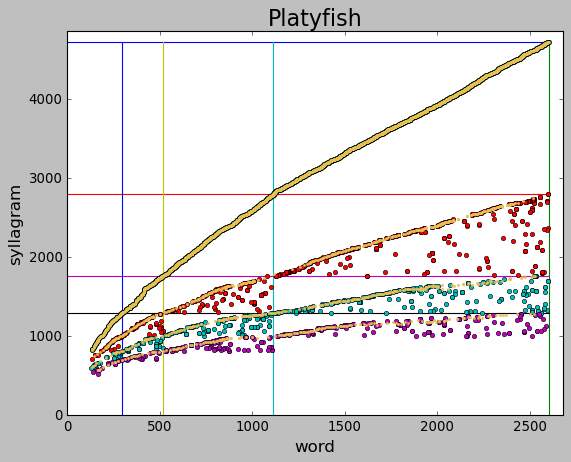

fitting range = [650, 2600]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Platyfish.txt)
read file successfully!
Successfully count word freqency!(./data/Text/SLUC_FBN_1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(SLUC_FBN_1.txt)


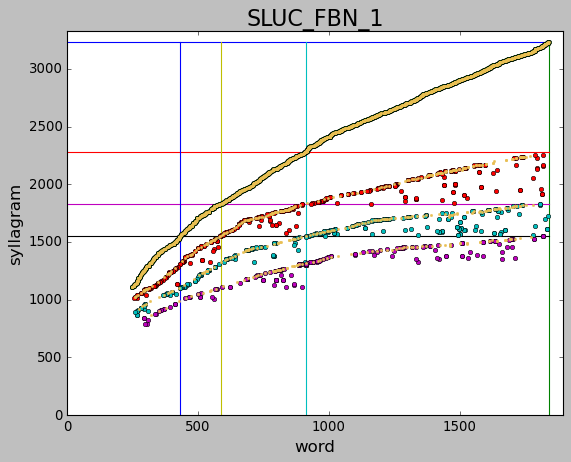

fitting range = [459, 1839]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(SLUC_FBN_1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/PKINGS_0.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(PKINGS_0.1.txt)


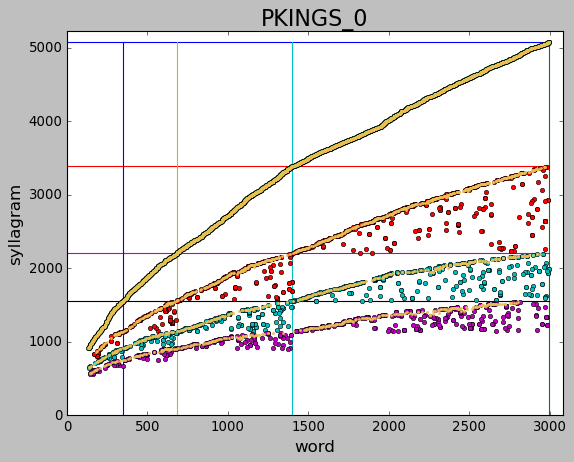

fitting range = [748, 2992]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(PKINGS_0.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Anan_2.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Anan_2.0.txt)


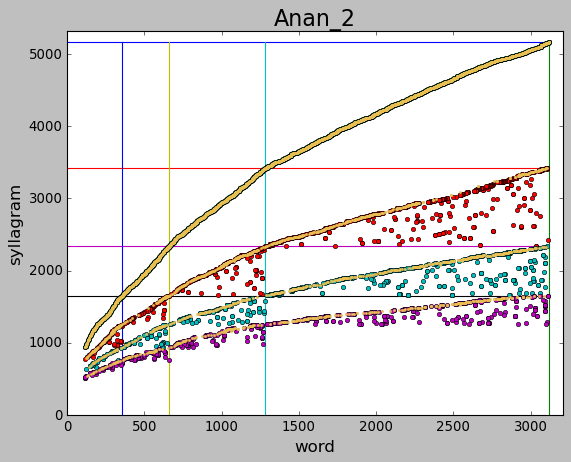

fitting range = [779, 3116]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Anan_2.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/CroPor_comp1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(CroPor_comp1.txt)


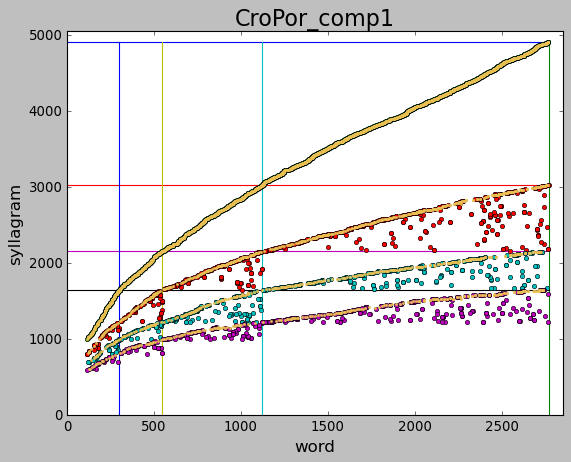

fitting range = [692, 2769]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(CroPor_comp1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/C_variegatus-1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(C_variegatus-1.0.txt)


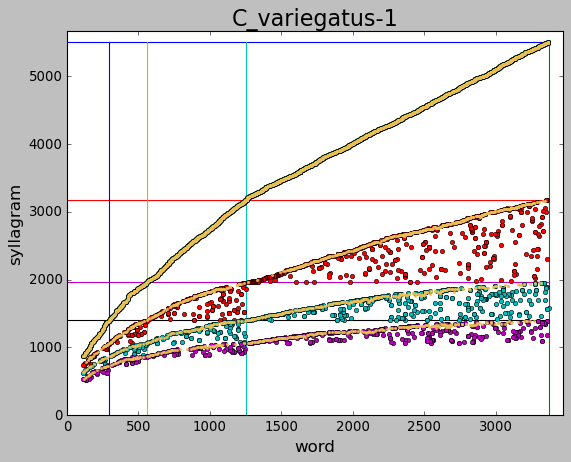

fitting range = [842, 3371]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(C_variegatus-1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASM283717v2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASM283717v2.txt)


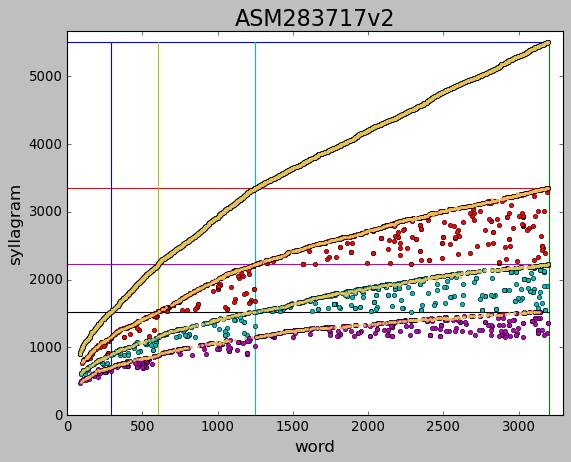

fitting range = [799, 3199]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASM283717v2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/fAnaTes1.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(fAnaTes1.2.txt)


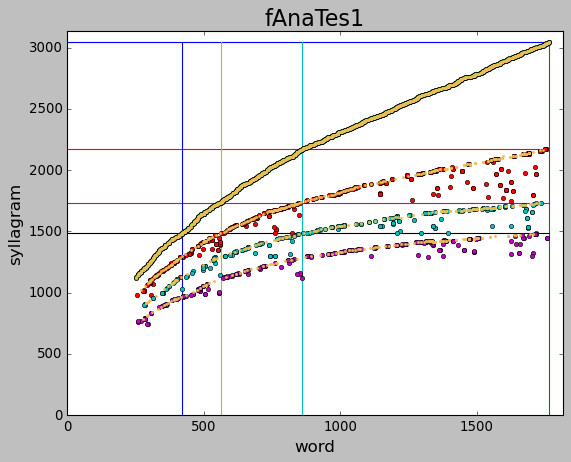

fitting range = [440, 1762]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(fAnaTes1.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/BallGen_V1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(BallGen_V1.txt)


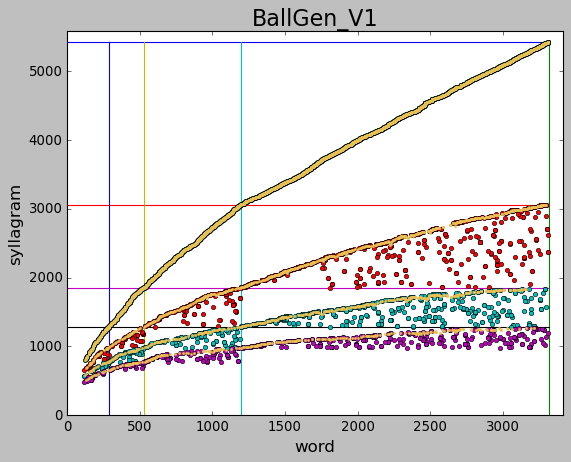

fitting range = [828, 3313]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(BallGen_V1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/fMasArm1.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(fMasArm1.2.txt)


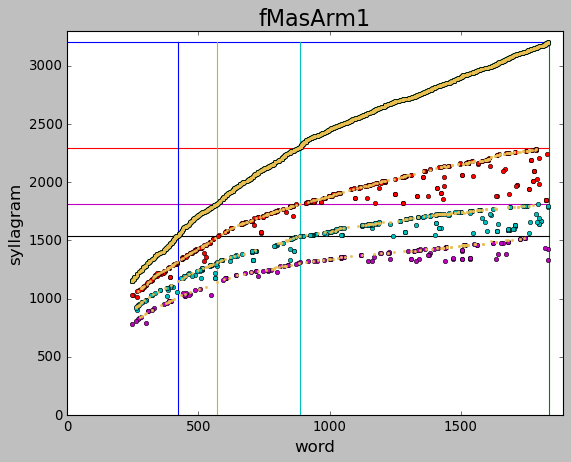

C < 0.8: g4/g3, 0.760000
fitting range = [458, 1834]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(fMasArm1.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Nana_v5.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Nana_v5.txt)


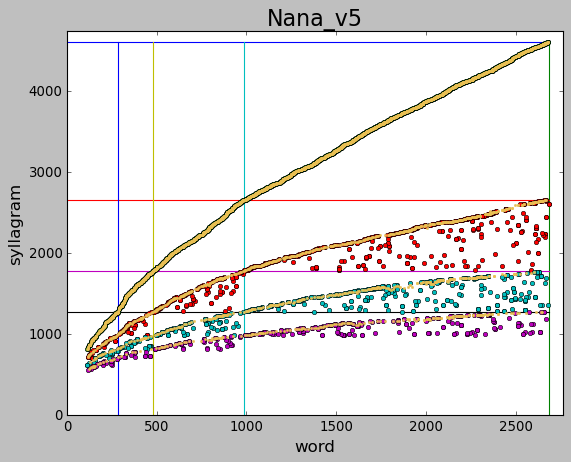

fitting range = [670, 2683]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Nana_v5.txt)
read file successfully!
Successfully count word freqency!(./data/Text/mSarHar1.11.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(mSarHar1.11.txt)


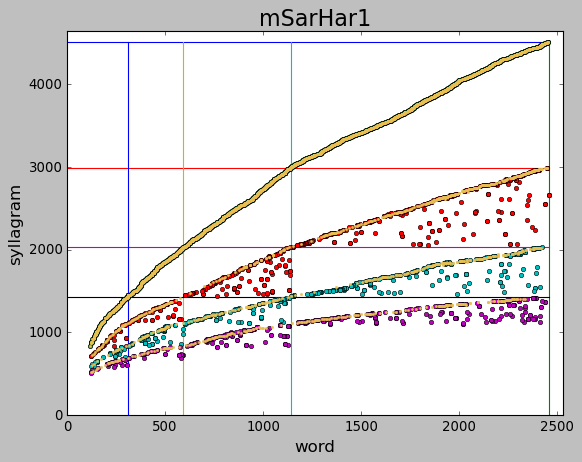

fitting range = [614, 2456]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(mSarHar1.11.txt)
read file successfully!
Successfully count word freqency!(./data/Text/IpCoco_1.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(IpCoco_1.2.txt)


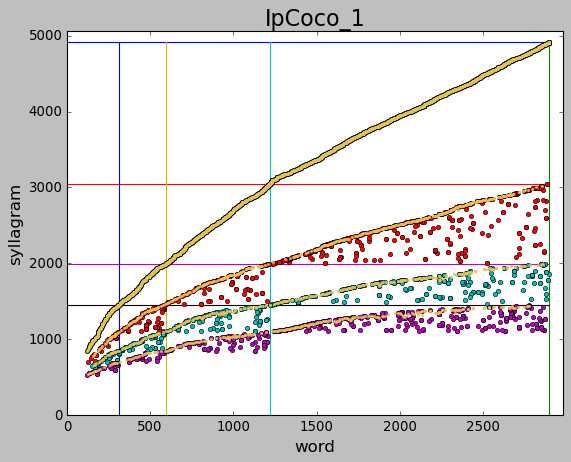

fitting range = [723, 2895]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(IpCoco_1.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/LatCha1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(LatCha1.txt)
the (5, 6) block have no point.


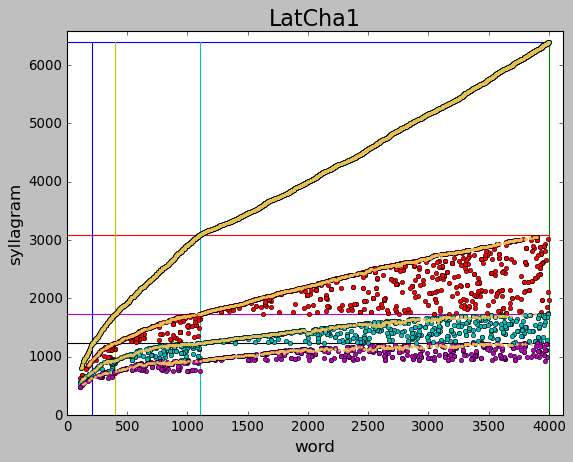

fitting range = [999, 3997]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(LatCha1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Myoluc2.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Myoluc2.0.txt)
the (5, 8) block have no point.


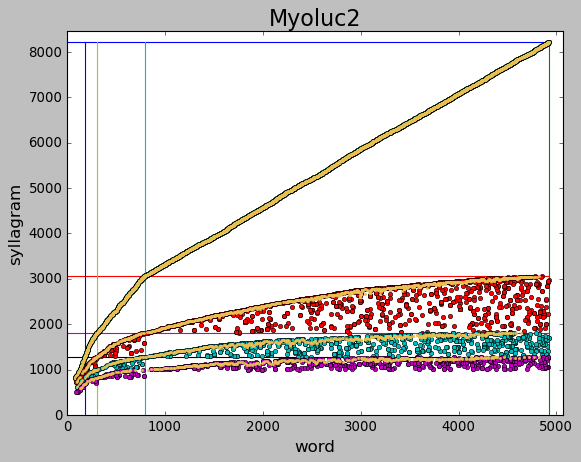

fitting range = [1230, 4920]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Myoluc2.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASM331708v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASM331708v1.txt)


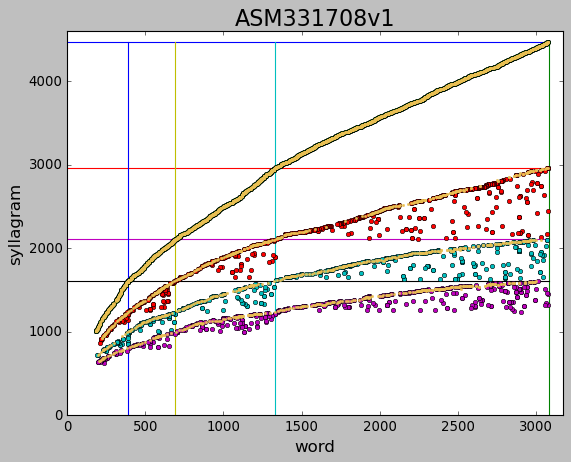

fitting range = [769, 3078]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASM331708v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Mmur_3.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Mmur_3.0.txt)


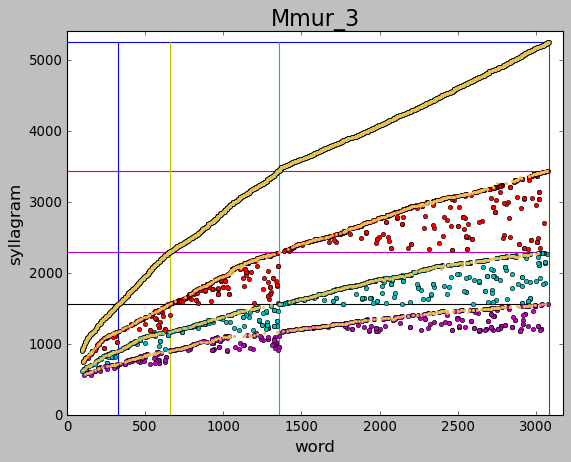

fitting range = [770, 3081]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Mmur_3.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Fundulus_heteroclitus-3.0.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Fundulus_heteroclitus-3.0.2.txt)


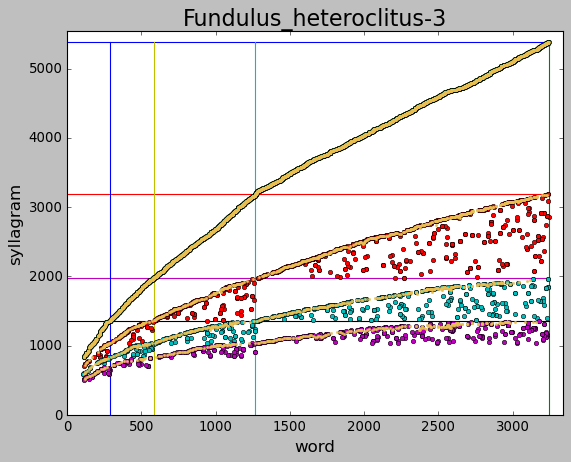

fitting range = [810, 3241]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Fundulus_heteroclitus-3.0.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/FicAlb1.5.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(FicAlb1.5.txt)


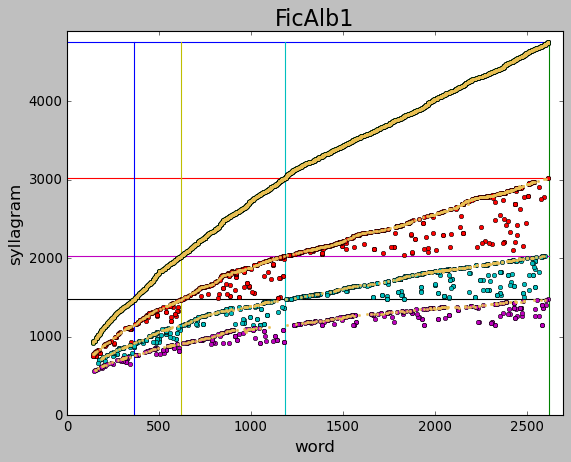

fitting range = [654, 2619]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(FicAlb1.5.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Tarsius_syrichta-2.0.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Tarsius_syrichta-2.0.1.txt)


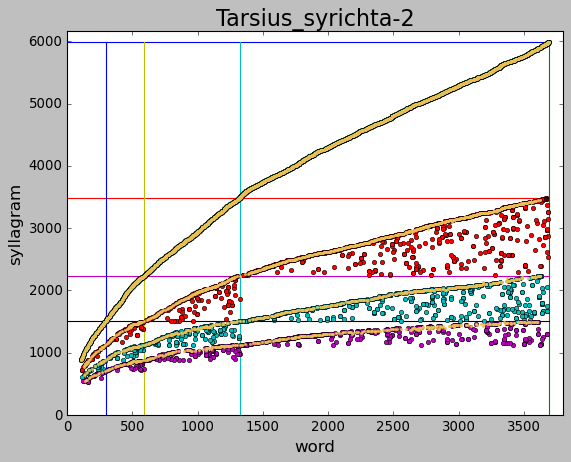

fitting range = [922, 3689]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Tarsius_syrichta-2.0.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/chicken.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(chicken.txt)


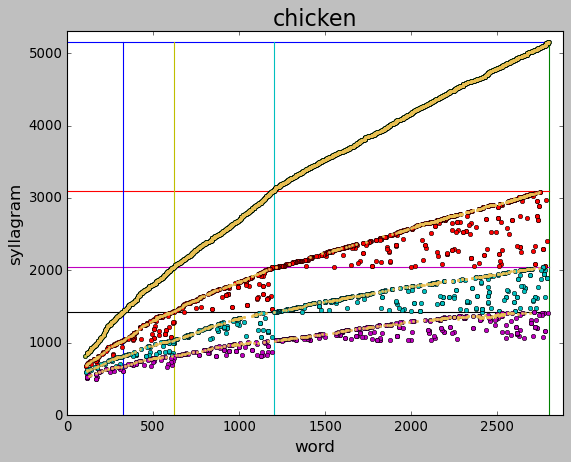

fitting range = [699, 2798]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(chicken.txt)
read file successfully!
Successfully count word freqency!(./data/Text/HLtupMer3.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(HLtupMer3.txt)


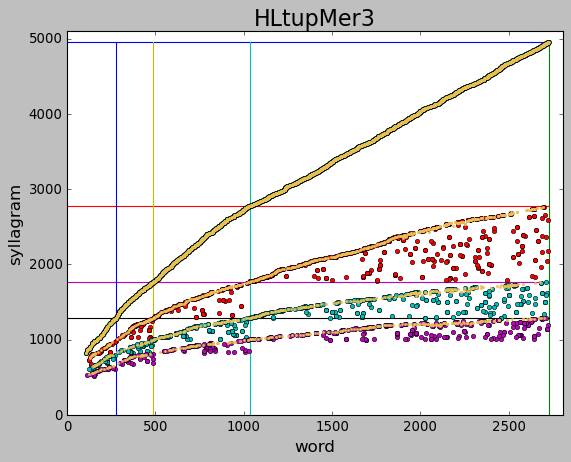

fitting range = [681, 2725]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(HLtupMer3.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASM275486v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASM275486v1.txt)


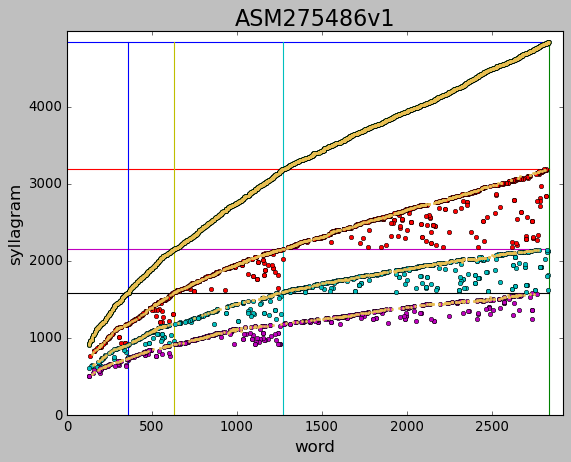

fitting range = [708, 2834]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASM275486v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Bison_UMD1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Bison_UMD1.0.txt)


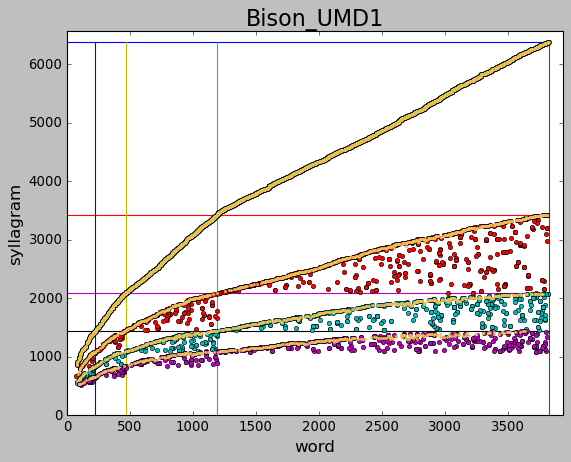

fitting range = [956, 3824]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Bison_UMD1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASM1334776v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASM1334776v1.txt)


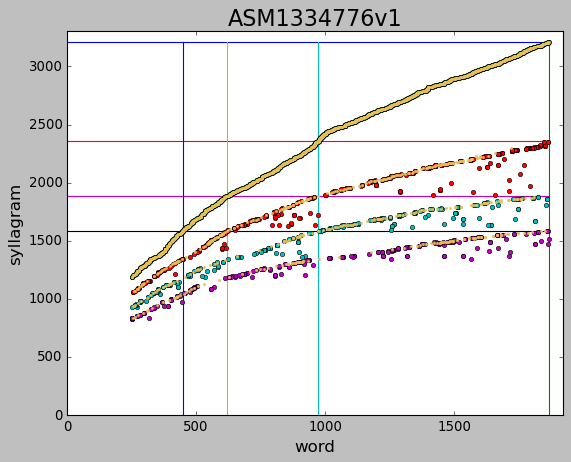

C < 0.8: g3/g2, 0.780000
C < 0.8: g4/g3, 0.700000
fitting range = [466, 1866]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASM1334776v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/MosMos_v2_BIUU_UCD.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(MosMos_v2_BIUU_UCD.txt)


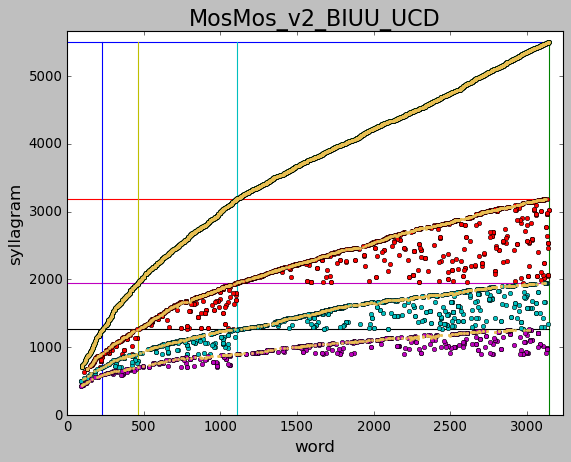

fitting range = [785, 3140]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(MosMos_v2_BIUU_UCD.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Mleu.le_1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Mleu.le_1.0.txt)


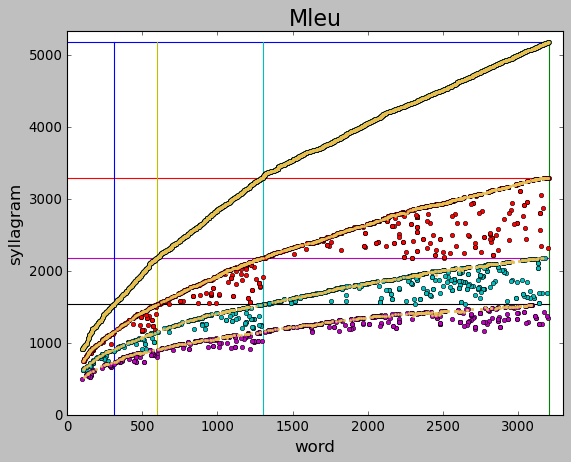

fitting range = [800, 3200]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Mleu.le_1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/fSclFor1.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(fSclFor1.1.txt)


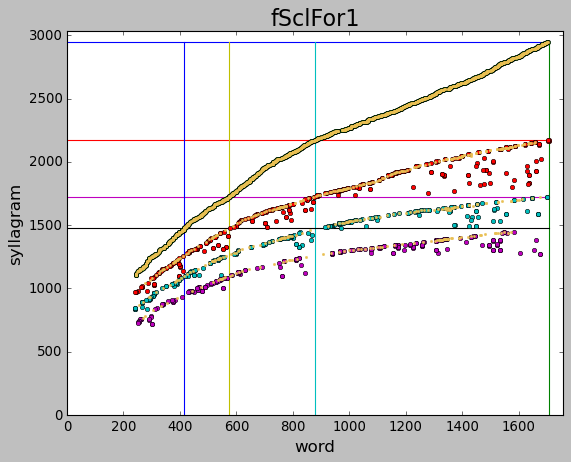

C < 0.8: g4/g3, 0.780000
fitting range = [426, 1705]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(fSclFor1.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/CAROLI_EIJ_v1.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(CAROLI_EIJ_v1.1.txt)


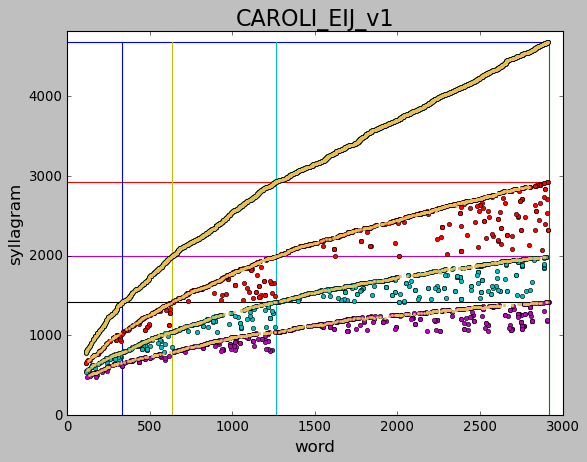

fitting range = [728, 2915]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(CAROLI_EIJ_v1.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/PanTig1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(PanTig1.0.txt)


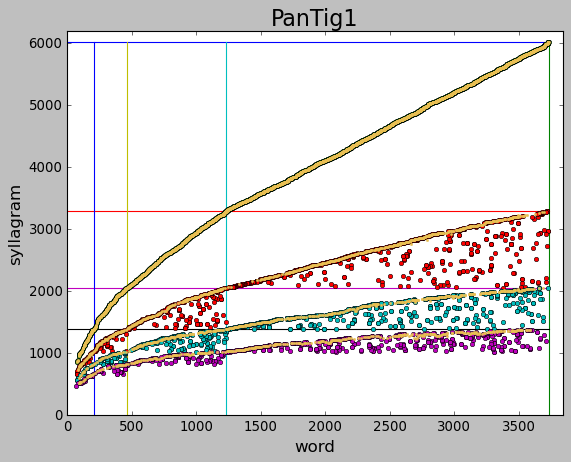

fitting range = [932, 3729]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(PanTig1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/fBetSpl5.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(fBetSpl5.2.txt)


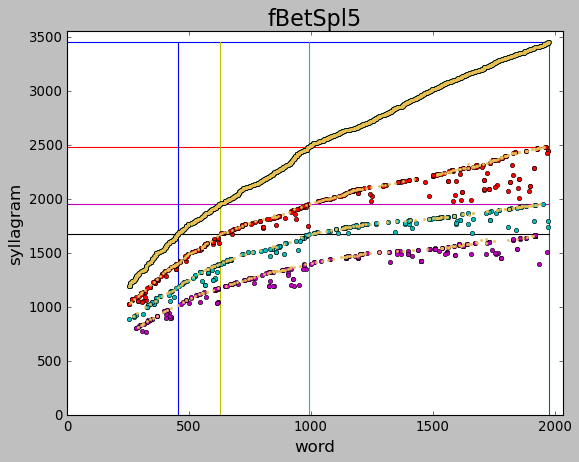

fitting range = [493, 1975]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(fBetSpl5.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/P_latipinna-1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(P_latipinna-1.0.txt)


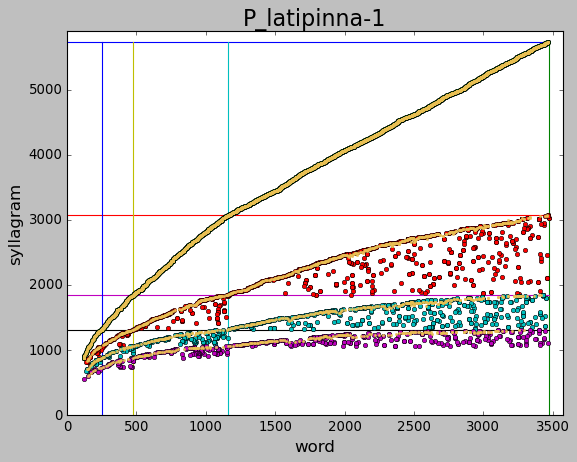

fitting range = [867, 3469]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(P_latipinna-1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/TS10Xv2-PRI.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(TS10Xv2-PRI.txt)


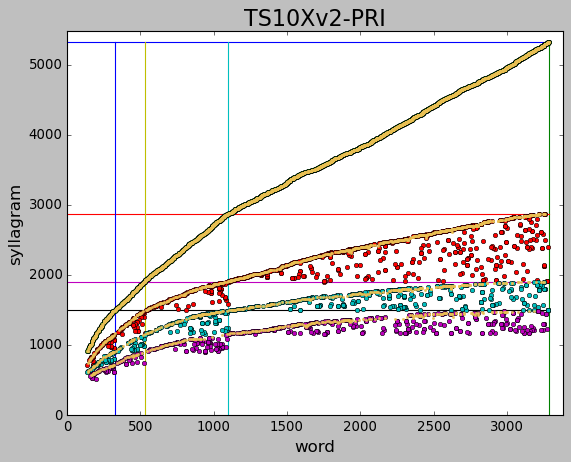

fitting range = [821, 3284]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(TS10Xv2-PRI.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASM334442v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASM334442v1.txt)


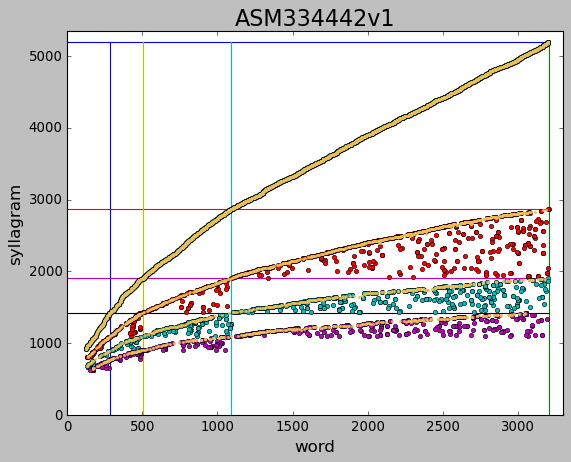

fitting range = [800, 3200]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASM334442v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/CanFam3.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(CanFam3.1.txt)


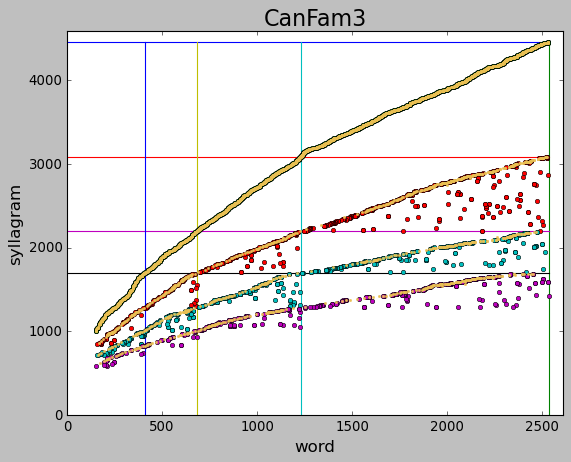

fitting range = [633, 2533]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(CanFam3.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Xenopus_tropicalis_v9.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Xenopus_tropicalis_v9.1.txt)


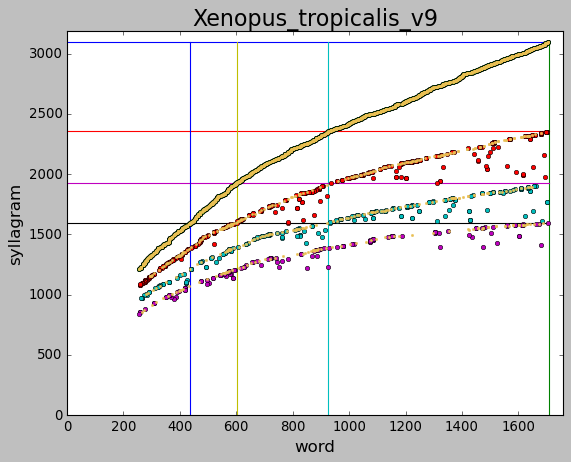

fitting range = [426, 1707]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Xenopus_tropicalis_v9.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Cebus_imitator-1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Cebus_imitator-1.0.txt)


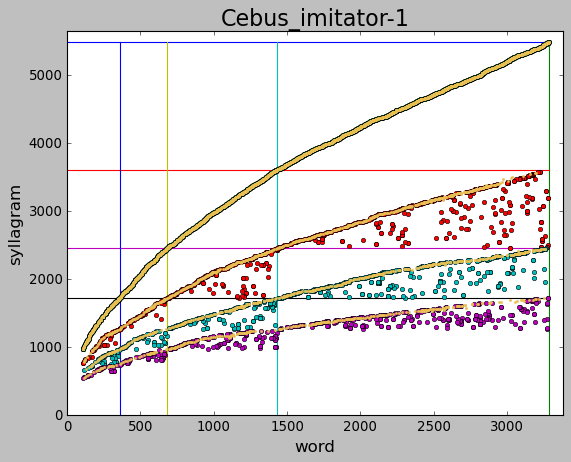

fitting range = [820, 3282]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Cebus_imitator-1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/S.galili_v1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(S.galili_v1.0.txt)


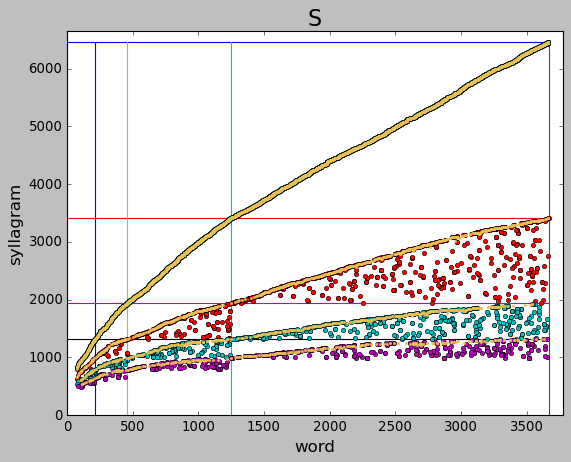

fitting range = [916, 3666]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(S.galili_v1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Mmul_10.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Mmul_10.txt)


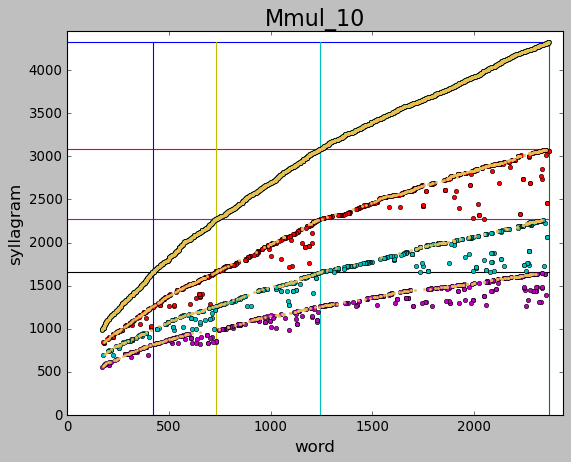

C < 0.8: g3/g2, 0.780000
C < 0.8: g4/g3, 0.780000
fitting range = [591, 2366]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Mmul_10.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Felis_catus_9.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Felis_catus_9.0.txt)


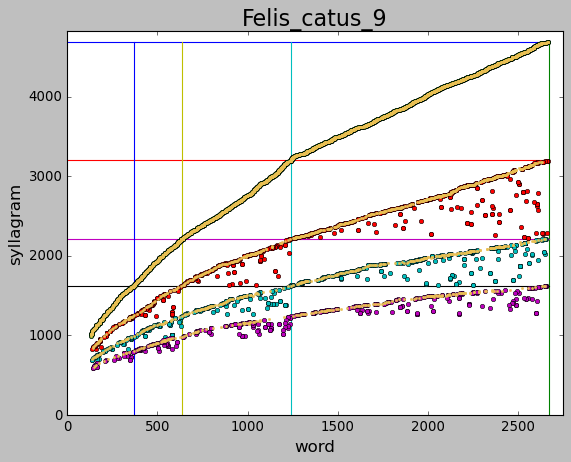

fitting range = [666, 2667]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Felis_catus_9.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/panpan1.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(panpan1.1.txt)


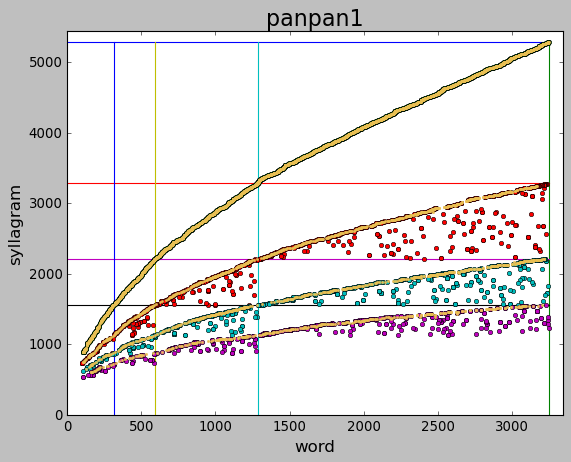

fitting range = [810, 3243]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(panpan1.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/MusPutFur1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(MusPutFur1.0.txt)
the (5, 6) block have no point.
the (5, 7) block have no point.
the (5, 8) block have no point.


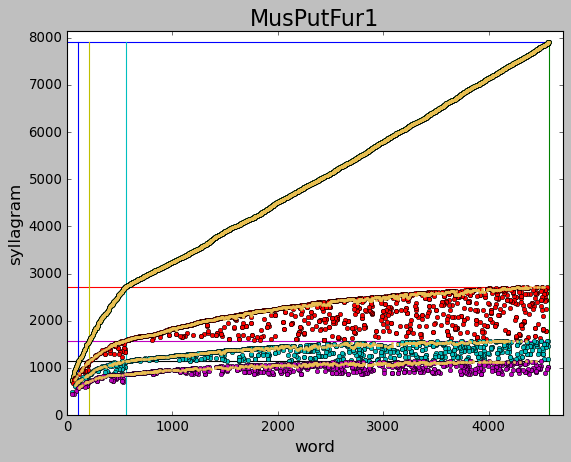

fitting range = [1141, 4567]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(MusPutFur1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/MesAur1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(MesAur1.0.txt)


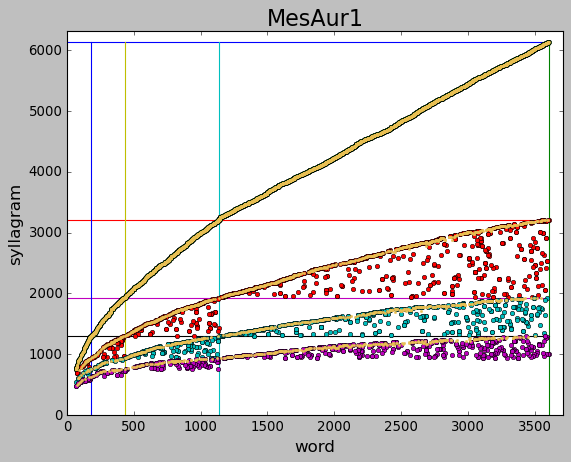

fitting range = [901, 3605]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(MesAur1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ARS-UCD1.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ARS-UCD1.2.txt)


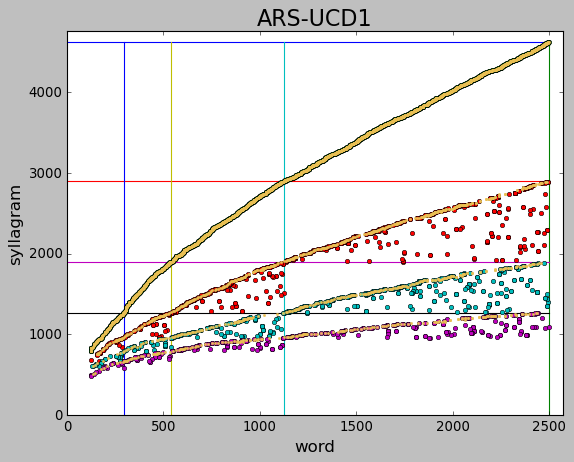

fitting range = [624, 2497]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ARS-UCD1.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/fTakRub1.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(fTakRub1.2.txt)


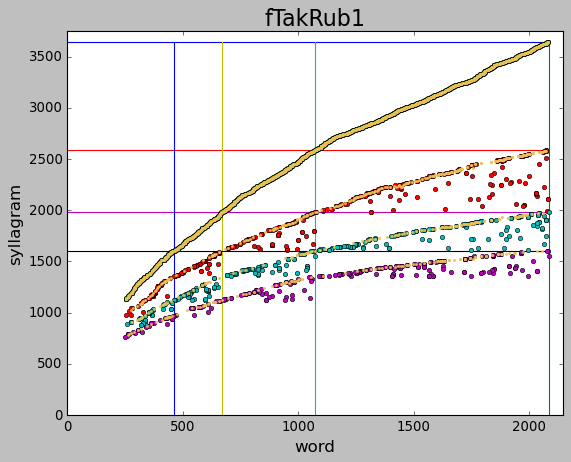

C < 0.8: g4/g3, 0.780000
fitting range = [520, 2083]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(fTakRub1.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/EBS10Xv2-PRI.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(EBS10Xv2-PRI.txt)


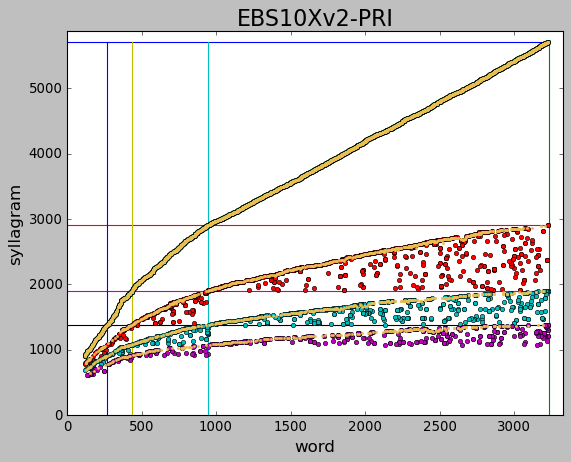

fitting range = [807, 3231]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(EBS10Xv2-PRI.txt)
read file successfully!
Successfully count word freqency!(./data/Text/gorGor4.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(gorGor4.txt)


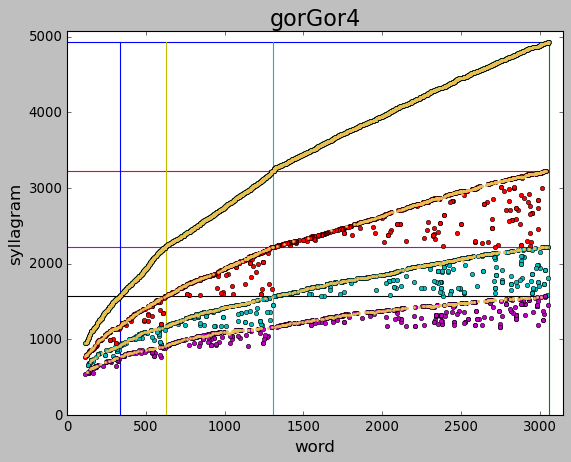

fitting range = [764, 3056]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(gorGor4.txt)
read file successfully!
Successfully count word freqency!(./data/Text/EquCab3.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(EquCab3.0.txt)


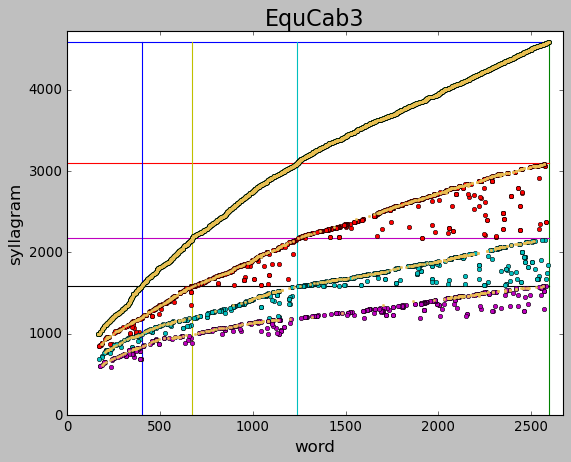

C < 0.8: g4/g3, 0.560000
fitting range = [648, 2593]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(EquCab3.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/CAU_duck1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(CAU_duck1.0.txt)


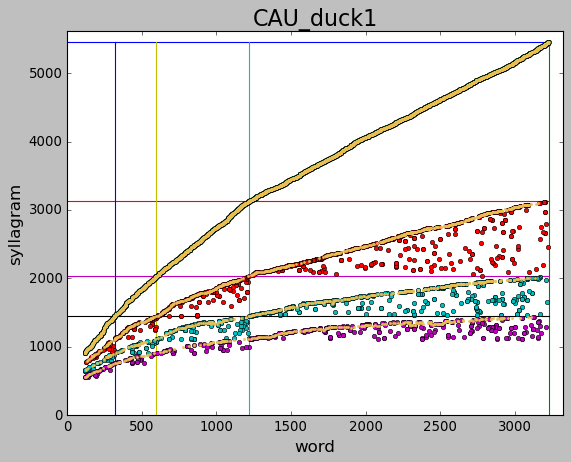

fitting range = [806, 3224]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(CAU_duck1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/BROAD S1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(BROAD S1.txt)


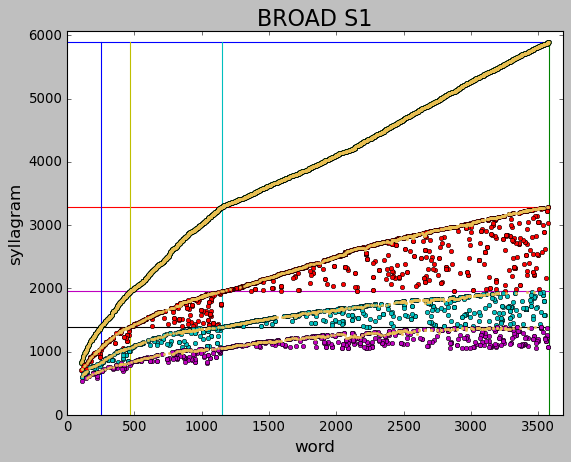

fitting range = [894, 3577]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(BROAD S1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Chrysemys_picta_bellii-3.0.3.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Chrysemys_picta_bellii-3.0.3.txt)


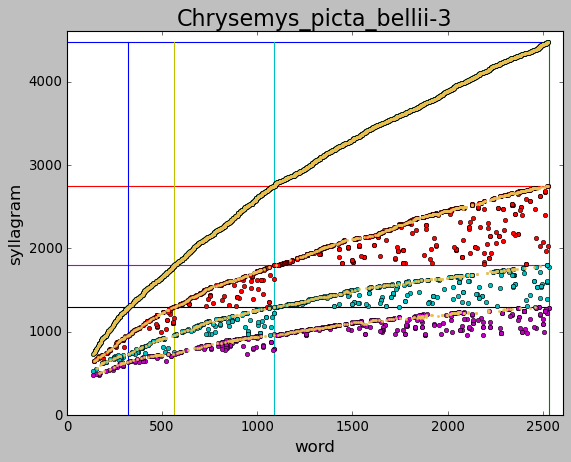

fitting range = [632, 2531]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Chrysemys_picta_bellii-3.0.3.txt)
read file successfully!
Successfully count word freqency!(./data/Text/CamDro2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(CamDro2.txt)


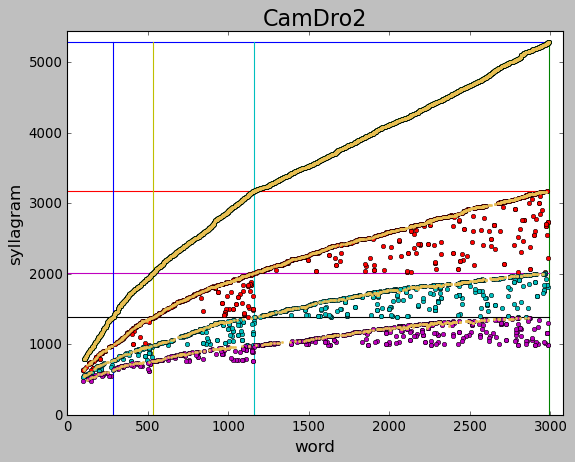

fitting range = [747, 2988]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(CamDro2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Turkey_5.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Turkey_5.1.txt)
the (4, 7) block have no point.


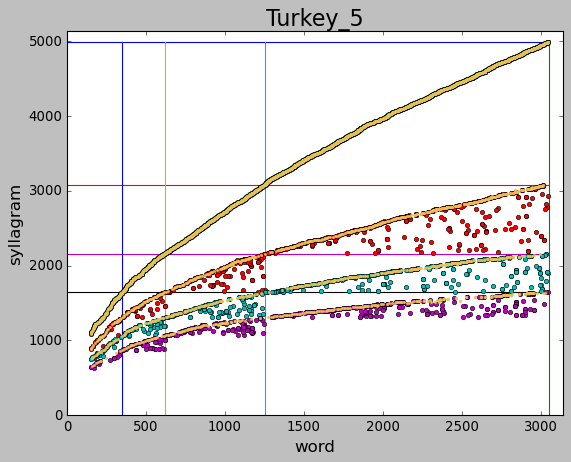

fitting range = [762, 3050]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Turkey_5.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/BosGru_v2.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(BosGru_v2.0.txt)


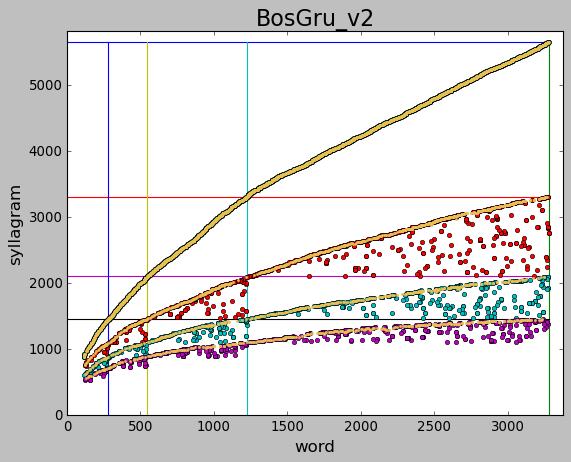

fitting range = [819, 3278]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(BosGru_v2.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASM69896v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASM69896v1.txt)


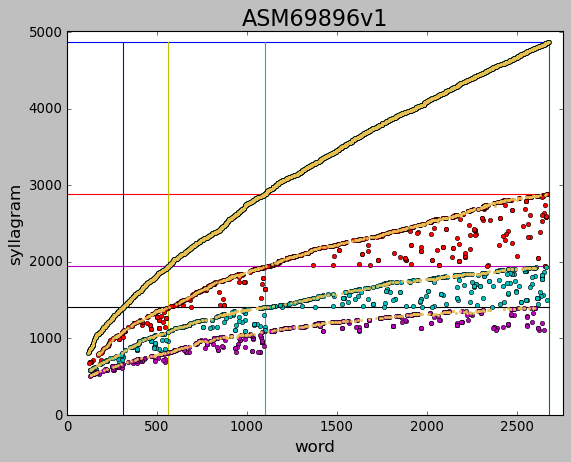

fitting range = [669, 2676]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASM69896v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/PanPar1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(PanPar1.0.txt)


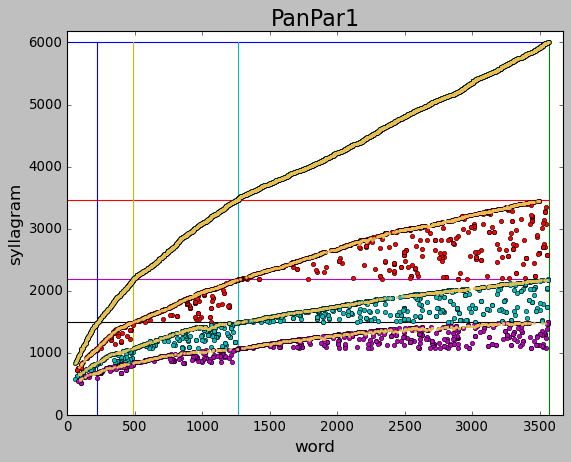

fitting range = [891, 3564]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(PanPar1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/turTru1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(turTru1.txt)
the (5, 6) block have no point.
the (5, 7) block have no point.
the (5, 8) block have no point.


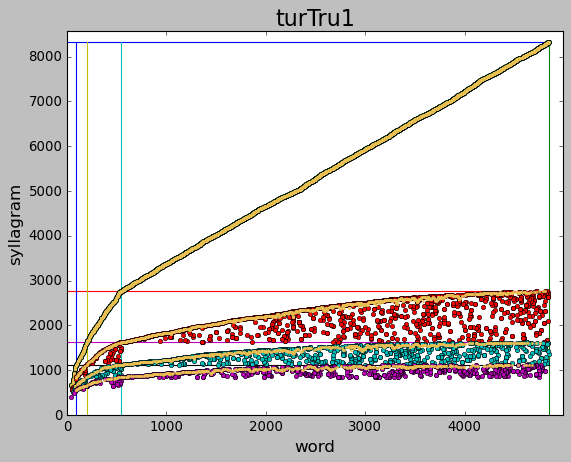

fitting range = [1211, 4844]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(turTru1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/bare-nosed_wombat_genome_assembly.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(bare-nosed_wombat_genome_assembly.txt)


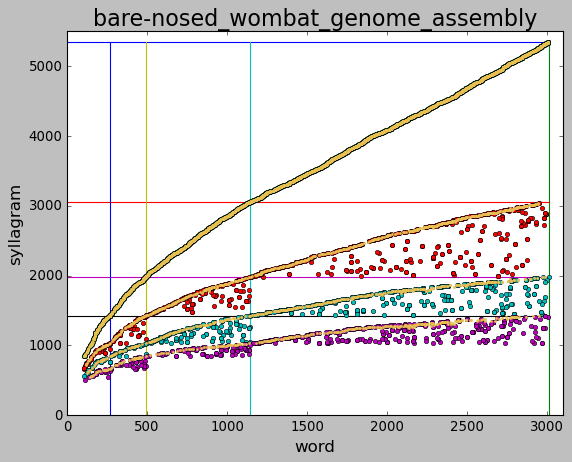

fitting range = [752, 3008]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(bare-nosed_wombat_genome_assembly.txt)
read file successfully!
Successfully count word freqency!(./data/Text/HU_Pman_2.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(HU_Pman_2.1.txt)
the (5, 8) block have no point.


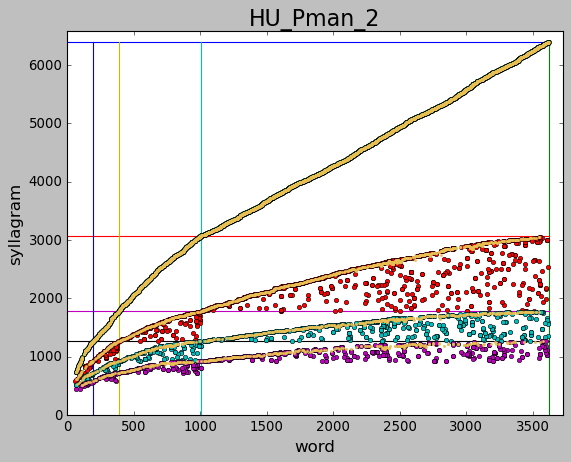

fitting range = [904, 3617]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(HU_Pman_2.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASM966780v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASM966780v1.txt)


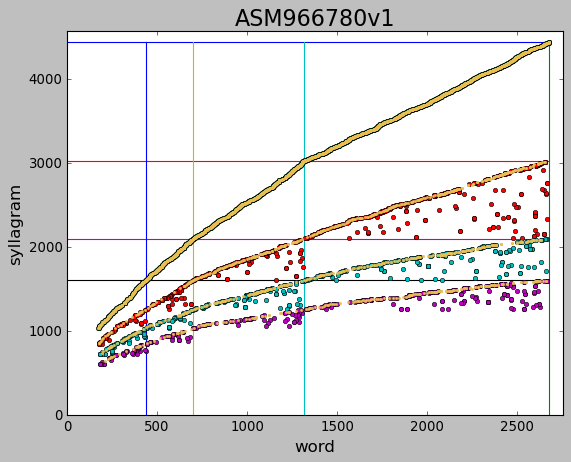

fitting range = [668, 2674]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASM966780v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/seabass_V1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(seabass_V1.0.txt)


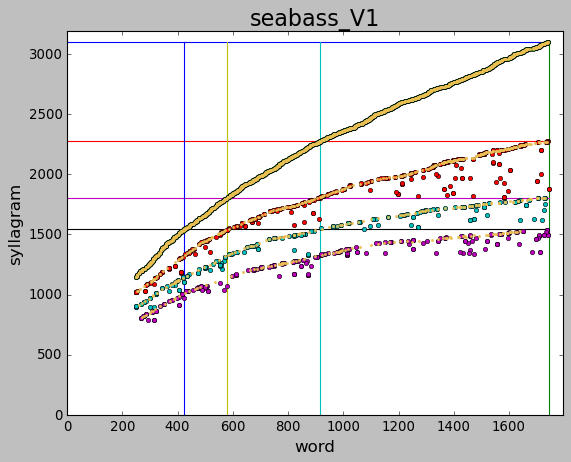

fitting range = [435, 1743]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(seabass_V1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/OchPri2.0-Ens.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(OchPri2.0-Ens.txt)
the (5, 8) block have no point.


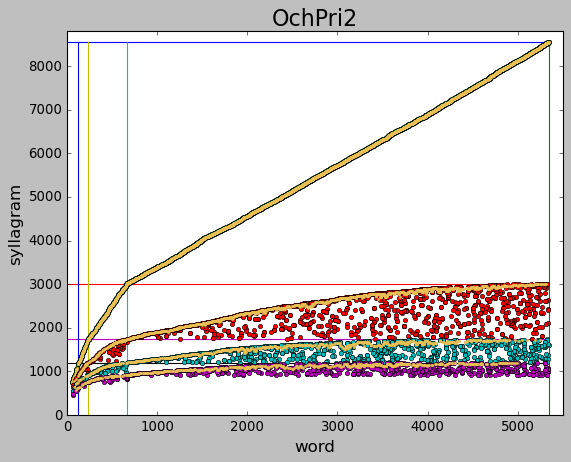

fitting range = [1335, 5341]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(OchPri2.0-Ens.txt)
read file successfully!
Successfully count word freqency!(./data/Text/M_zebra_UMD2a.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(M_zebra_UMD2a.txt)


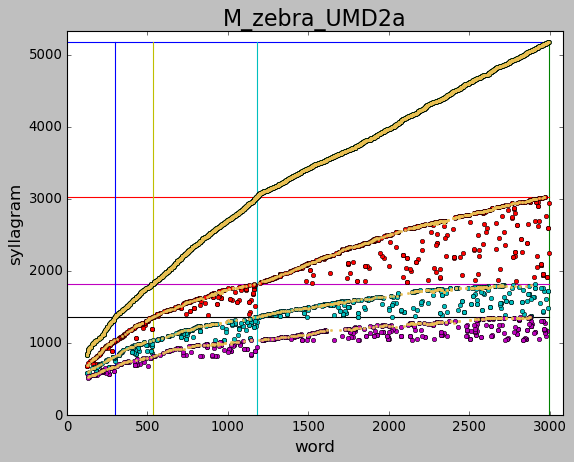

fitting range = [748, 2994]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(M_zebra_UMD2a.txt)
read file successfully!
Successfully count word freqency!(./data/Text/common_carp_genome.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(common_carp_genome.txt)


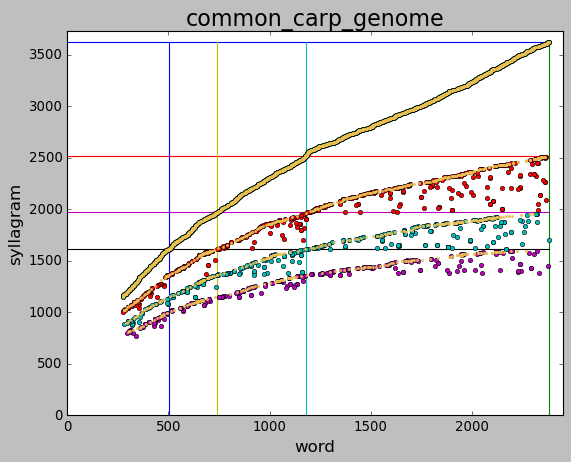

fitting range = [594, 2377]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(common_carp_genome.txt)
read file successfully!
Successfully count word freqency!(./data/Text/pteVam1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(pteVam1.txt)


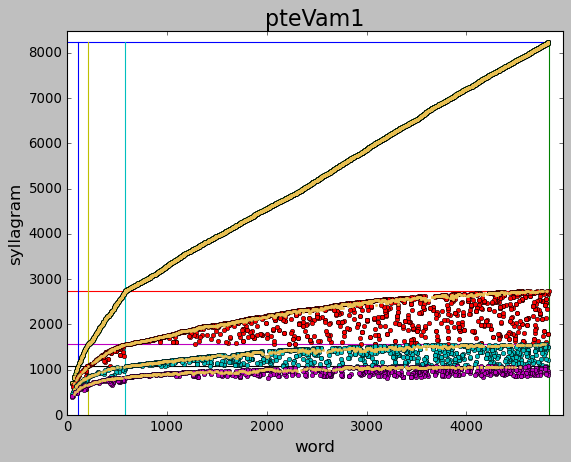

fitting range = [1205, 4822]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(pteVam1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Om_v0.7.RACA.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Om_v0.7.RACA.txt)


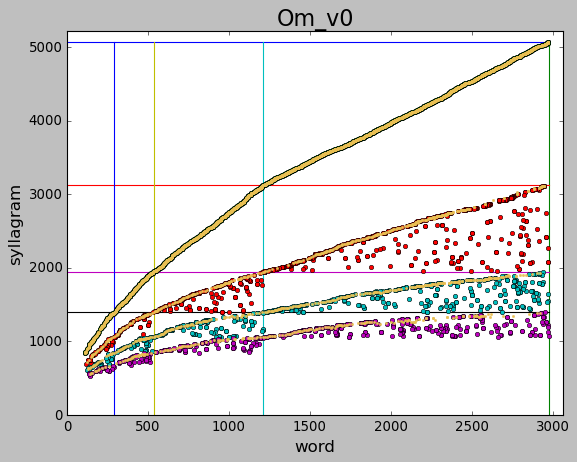

fitting range = [743, 2973]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Om_v0.7.RACA.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Rrox_v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Rrox_v1.txt)


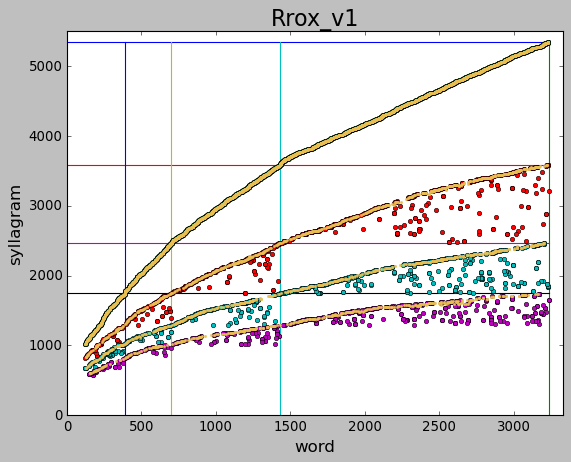

fitting range = [808, 3232]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Rrox_v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASM359739v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASM359739v1.txt)


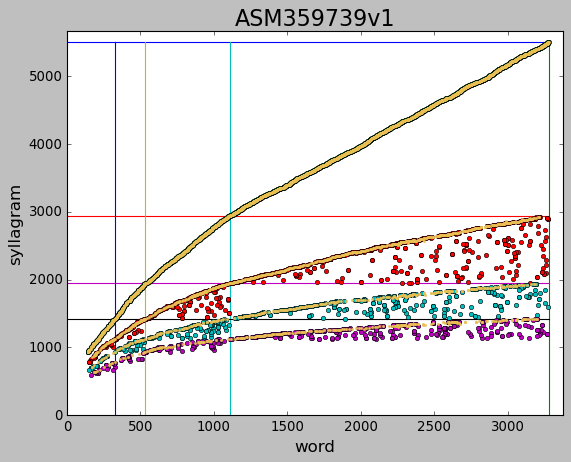

fitting range = [819, 3276]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASM359739v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/NeoBri1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(NeoBri1.0.txt)


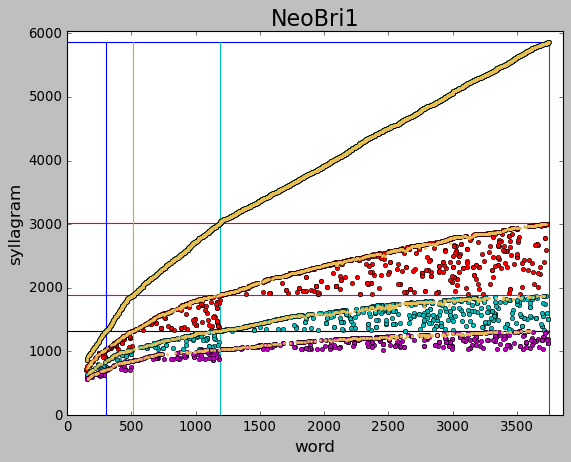

fitting range = [936, 3745]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(NeoBri1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/MUSP714.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(MUSP714.txt)


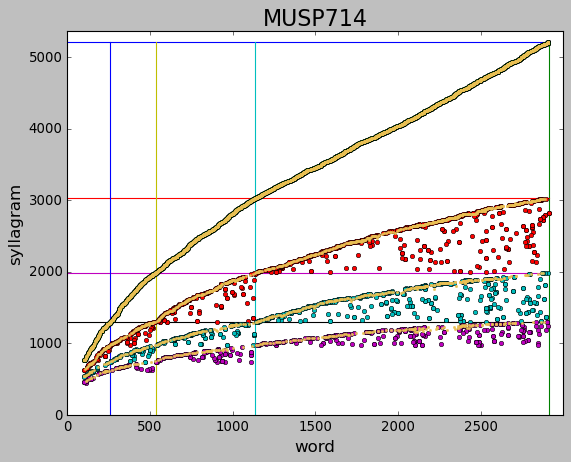

fitting range = [727, 2908]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(MUSP714.txt)
read file successfully!
Successfully count word freqency!(./data/Text/PunNye1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(PunNye1.0.txt)


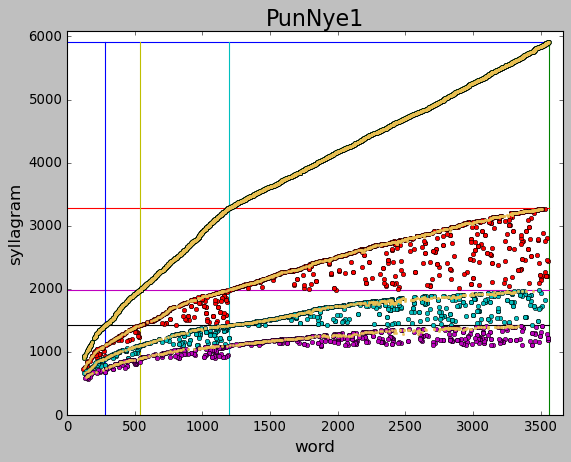

fitting range = [889, 3559]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(PunNye1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/mPhoSin1.pri.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(mPhoSin1.pri.txt)


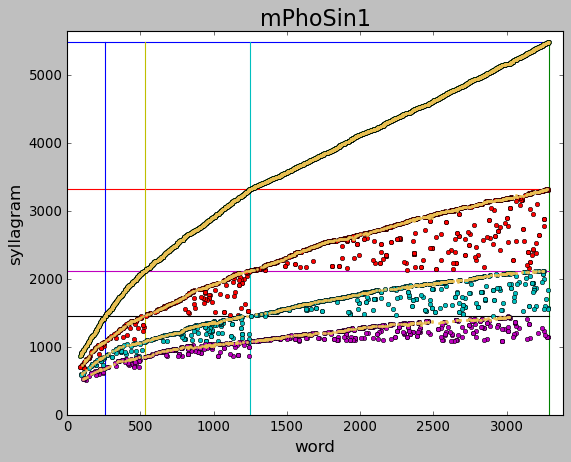

fitting range = [821, 3286]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(mPhoSin1.pri.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ICSASG_v2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ICSASG_v2.txt)


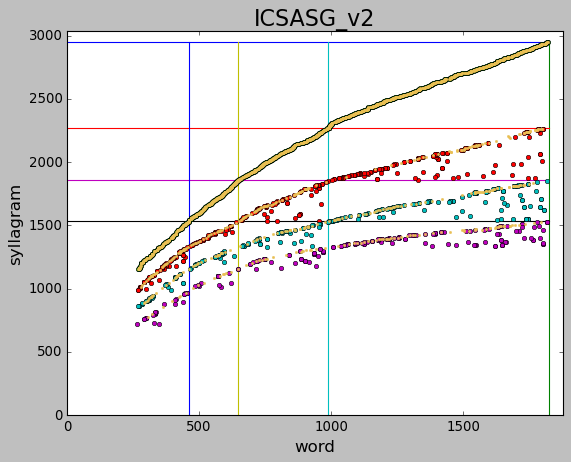

C < 0.8: g3/g2, 0.700000
fitting range = [455, 1823]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ICSASG_v2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/proCap1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(proCap1.txt)
the (5, 7) block have no point.


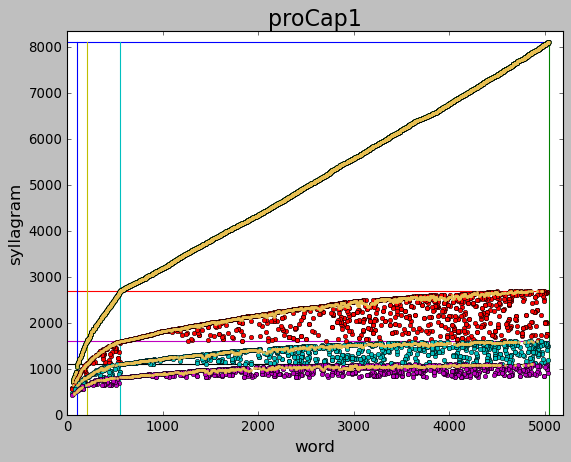

fitting range = [1259, 5037]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(proCap1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ChiLan1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ChiLan1.0.txt)
the (5, 8) block have no point.


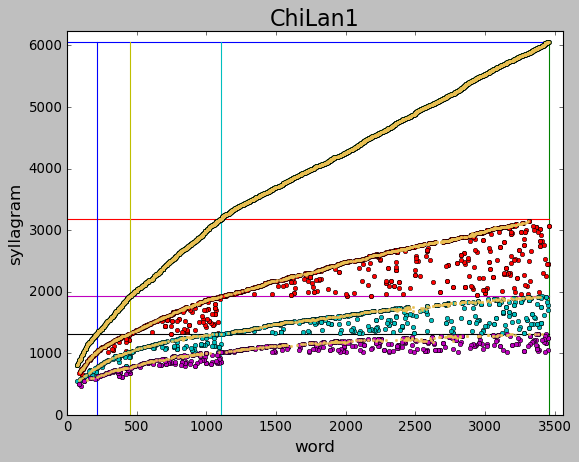

fitting range = [864, 3457]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ChiLan1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Ee_SOAP_WITH_SSPACE.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Ee_SOAP_WITH_SSPACE.txt)


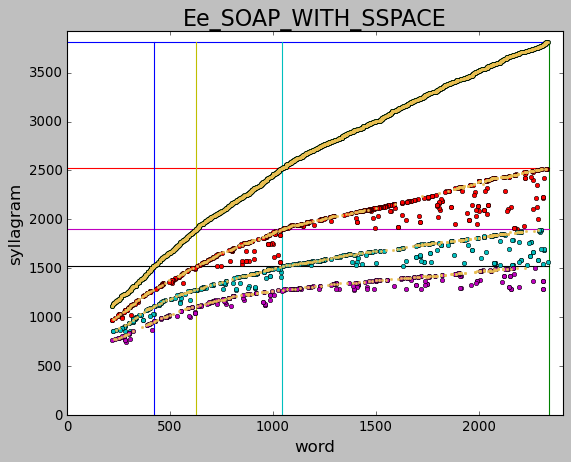

fitting range = [585, 2340]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Ee_SOAP_WITH_SSPACE.txt)
read file successfully!
Successfully count word freqency!(./data/Text/PAHARI_EIJ_v1.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(PAHARI_EIJ_v1.1.txt)


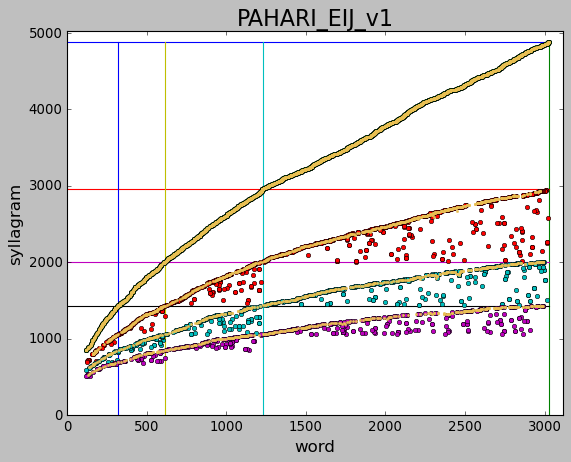

fitting range = [756, 3025]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(PAHARI_EIJ_v1.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Astyanax_mexicanus-2.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Astyanax_mexicanus-2.0.txt)
the (5, 8) block have no point.


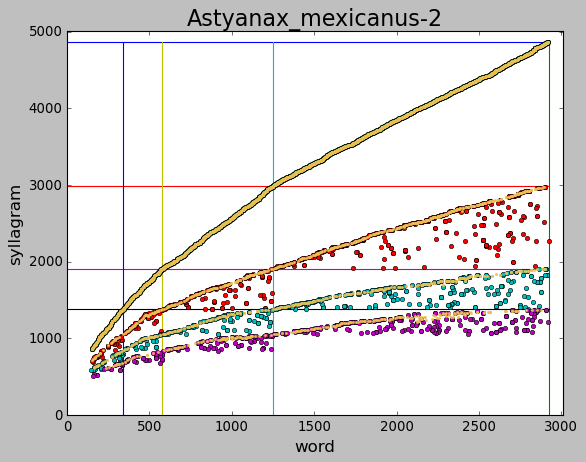

fitting range = [730, 2922]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Astyanax_mexicanus-2.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/sorAra1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(sorAra1.txt)


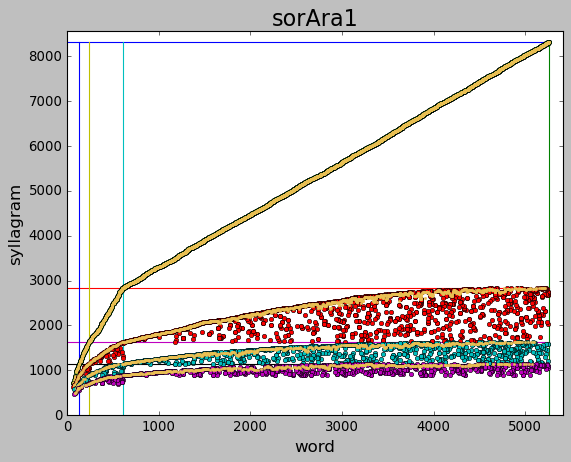

fitting range = [1313, 5253]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(sorAra1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Loxafr3.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Loxafr3.0.txt)


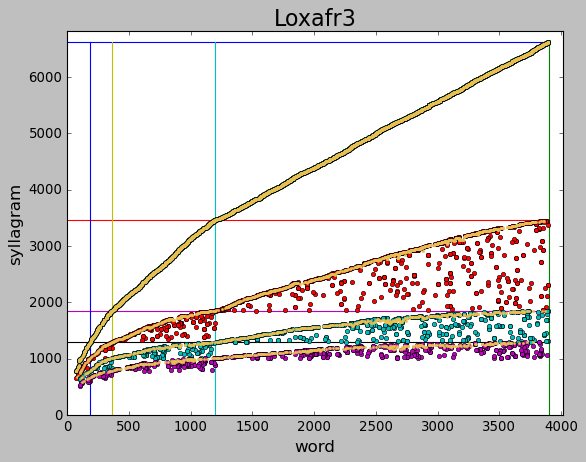

fitting range = [974, 3899]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Loxafr3.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/TENREC.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(TENREC.txt)
the (5, 6) block have no point.
the (4, 6) block have no point.
the (5, 8) block have no point.


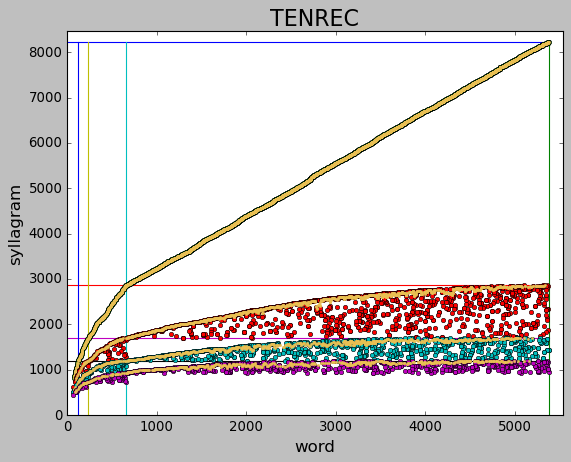

fitting range = [1343, 5374]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(TENREC.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Stegastes_partitus-1.0.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Stegastes_partitus-1.0.2.txt)
the (5, 8) block have no point.


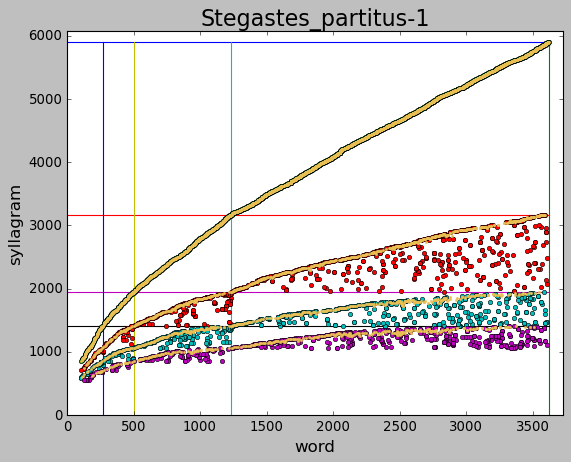

fitting range = [905, 3620]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Stegastes_partitus-1.0.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASM858656v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASM858656v1.txt)


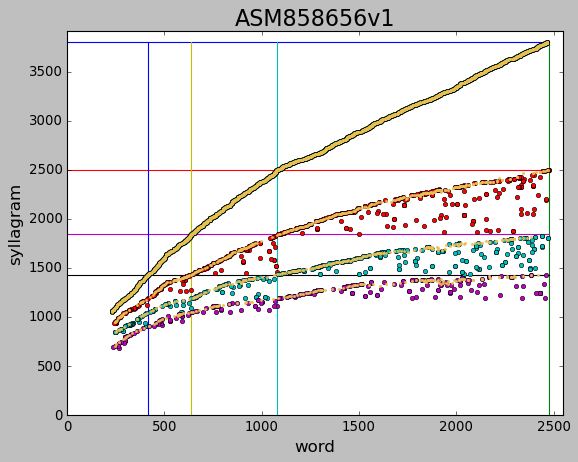

fitting range = [618, 2474]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASM858656v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/PodMur_1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(PodMur_1.0.txt)


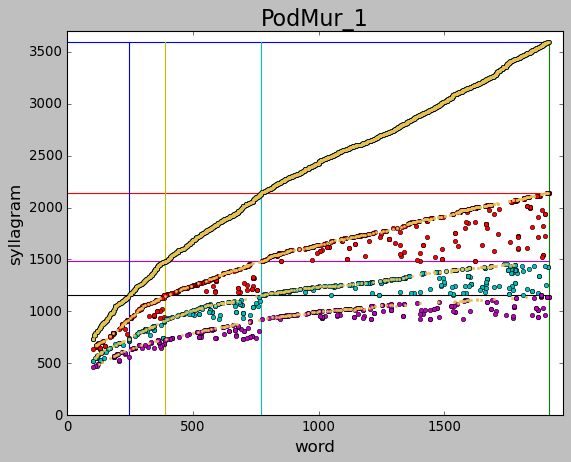

C < 0.8: g4/g3, 0.740000
fitting range = [478, 1914]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(PodMur_1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/choHof1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(choHof1.txt)
the (5, 6) block have no point.
the (4, 6) block have no point.


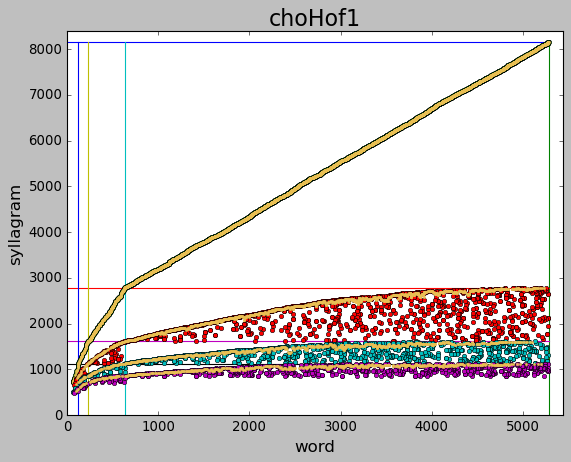

fitting range = [1320, 5281]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(choHof1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/SCA1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(SCA1.txt)


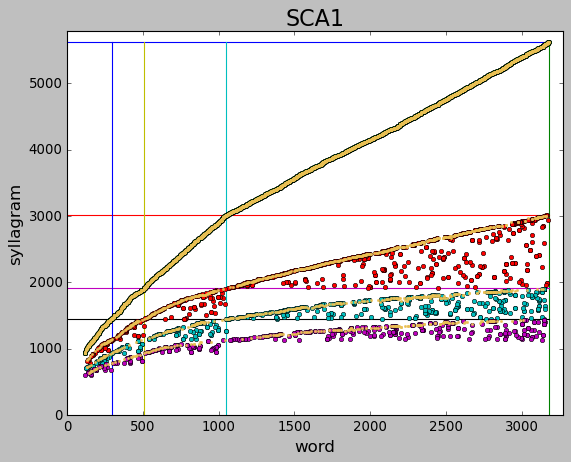

fitting range = [794, 3176]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(SCA1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/latLat_1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(latLat_1.0.txt)


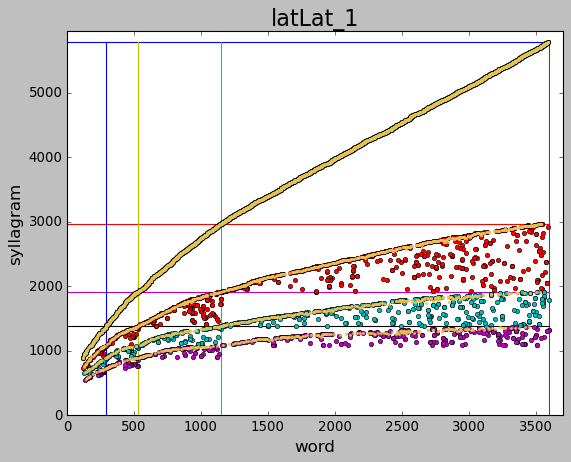

fitting range = [899, 3597]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(latLat_1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/fAstCal1.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(fAstCal1.2.txt)


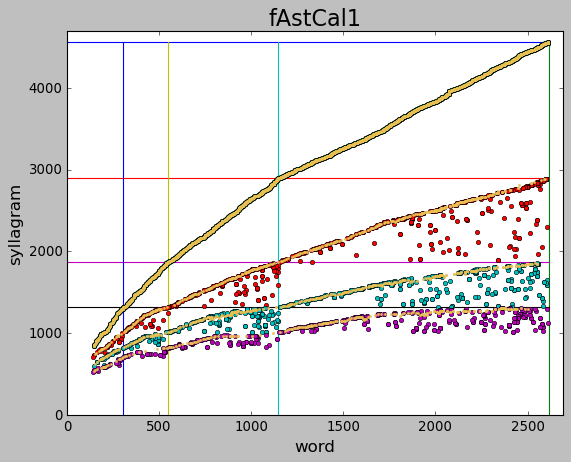

fitting range = [653, 2614]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(fAstCal1.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Pan_tro_3.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Pan_tro_3.0.txt)


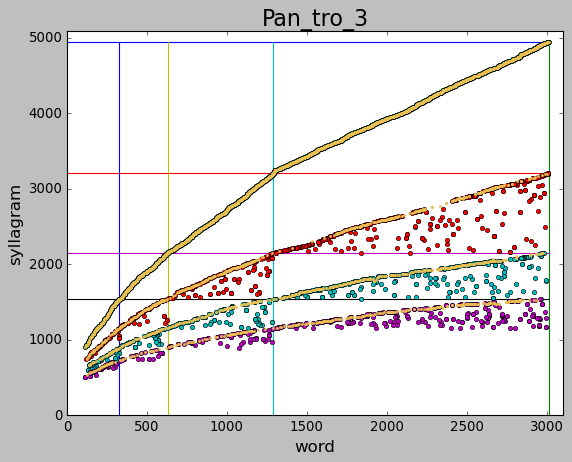

fitting range = [752, 3009]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Pan_tro_3.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/JacJac1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(JacJac1.0.txt)


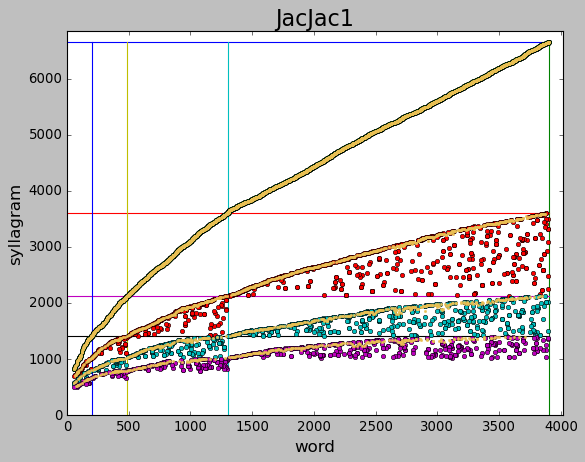

fitting range = [975, 3900]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(JacJac1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Dord_2.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Dord_2.0.txt)
the (5, 7) block have no point.


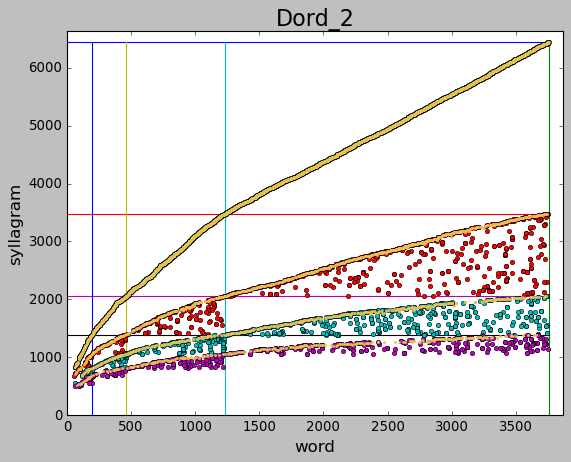

fitting range = [939, 3756]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Dord_2.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Mnem_1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Mnem_1.0.txt)


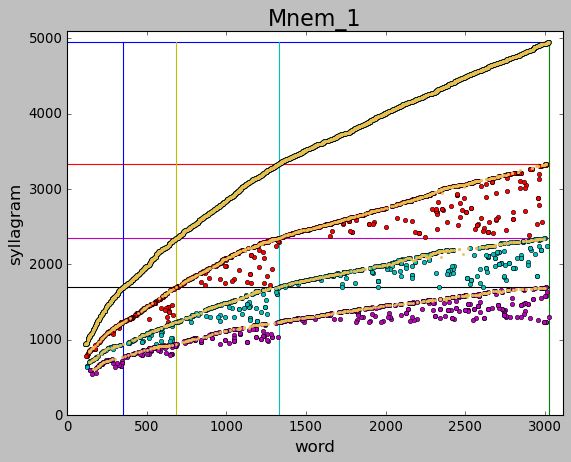

fitting range = [755, 3022]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Mnem_1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/rGopEvg1_v1.p.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(rGopEvg1_v1.p.txt)


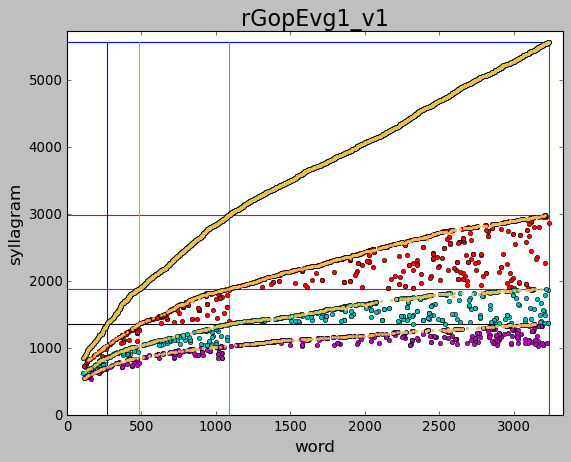

fitting range = [808, 3235]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(rGopEvg1_v1.p.txt)
read file successfully!
Successfully count word freqency!(./data/Text/OryCun2.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(OryCun2.0.txt)


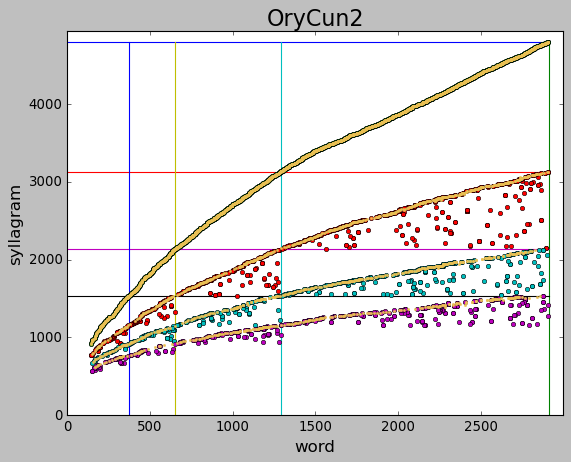

fitting range = [727, 2909]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(OryCun2.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Nemo_v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Nemo_v1.txt)


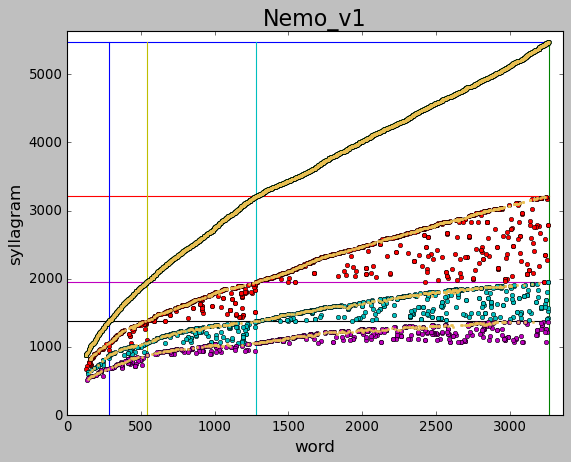

fitting range = [815, 3263]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Nemo_v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/gadMor3.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(gadMor3.0.txt)


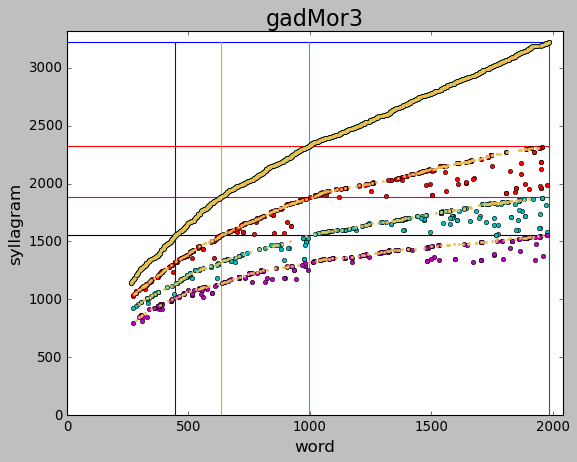

fitting range = [495, 1983]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(gadMor3.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Sdu_1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Sdu_1.0.txt)


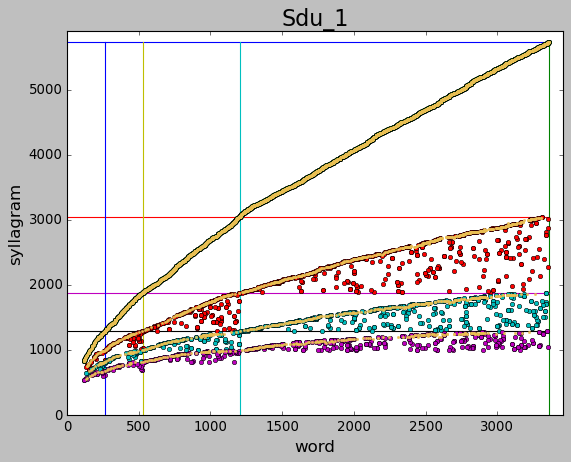

fitting range = [839, 3358]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Sdu_1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Midas_v5.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Midas_v5.txt)


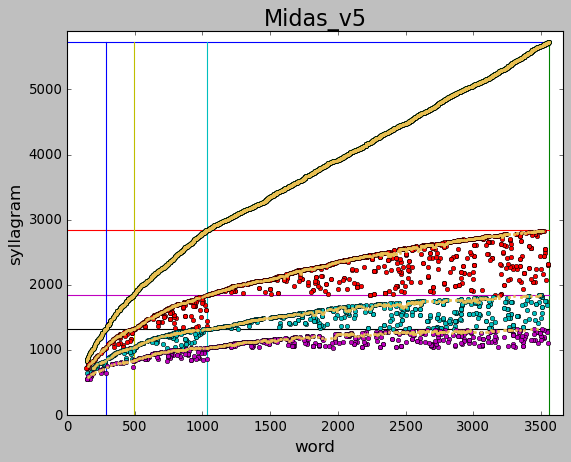

fitting range = [889, 3556]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Midas_v5.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Pcoq_1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Pcoq_1.0.txt)


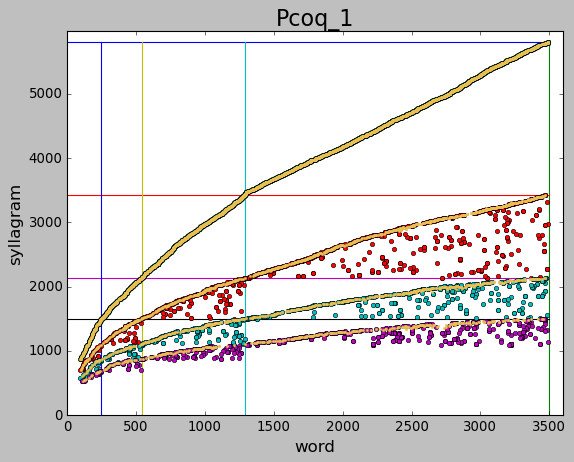

fitting range = [873, 3494]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Pcoq_1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/GeoFor_1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(GeoFor_1.0.txt)


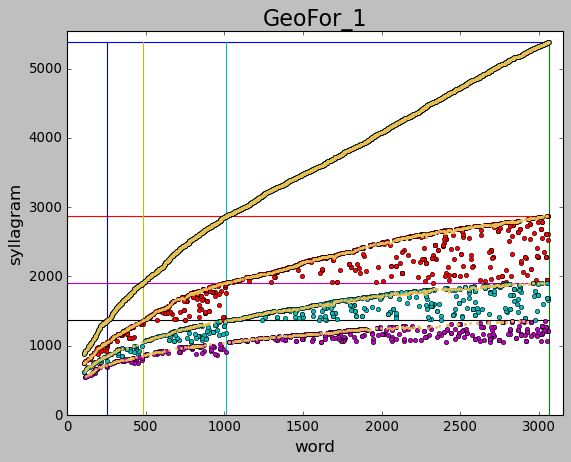

fitting range = [765, 3062]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(GeoFor_1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/bTaeGut1_v1.p.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(bTaeGut1_v1.p.txt)


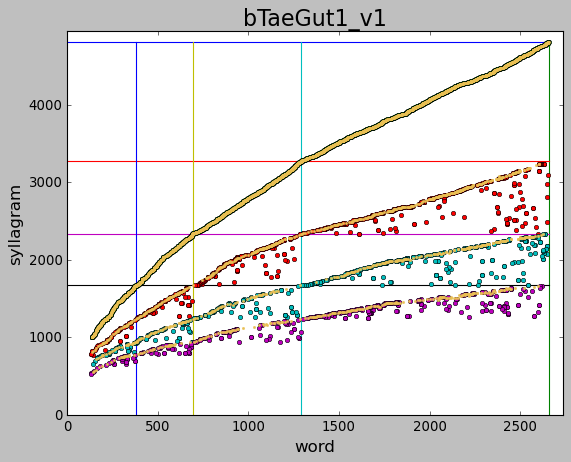

fitting range = [664, 2656]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(bTaeGut1_v1.p.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Empirical Tests of Zipf.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Empirical Tests of Zipf.txt)
the (5, 7) block have no point.
the (5, 7) block have no point.


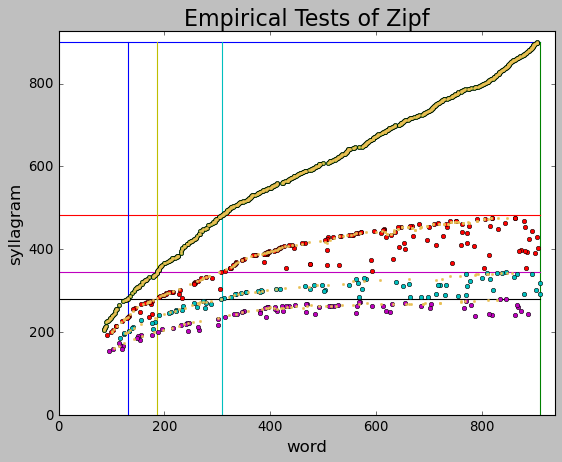

C < 0.8: g3/g2, 0.680000
C < 0.8: g4/g3, 0.520000
fitting range = [227, 909]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Empirical Tests of Zipf.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Pygocentrus_nattereri-1.0.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Pygocentrus_nattereri-1.0.2.txt)


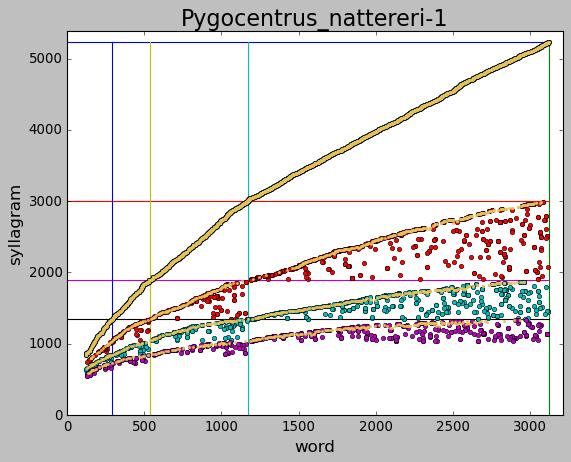

fitting range = [779, 3118]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Pygocentrus_nattereri-1.0.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Prosim_1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Prosim_1.0.txt)


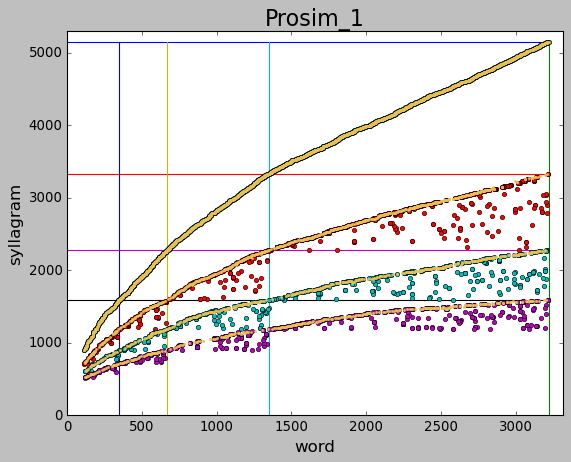

fitting range = [805, 3221]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Prosim_1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Poecilia_formosa-5.1.2.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Poecilia_formosa-5.1.2.txt)


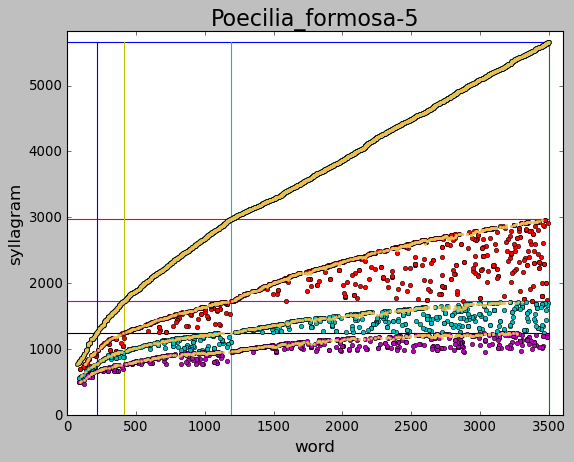

fitting range = [874, 3496]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Poecilia_formosa-5.1.2.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ARS1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ARS1.txt)


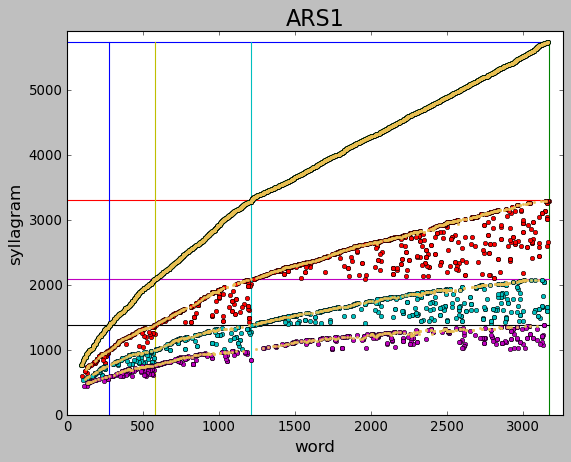

fitting range = [792, 3171]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ARS1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/ASB_HGAPassembly_v1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(ASB_HGAPassembly_v1.txt)


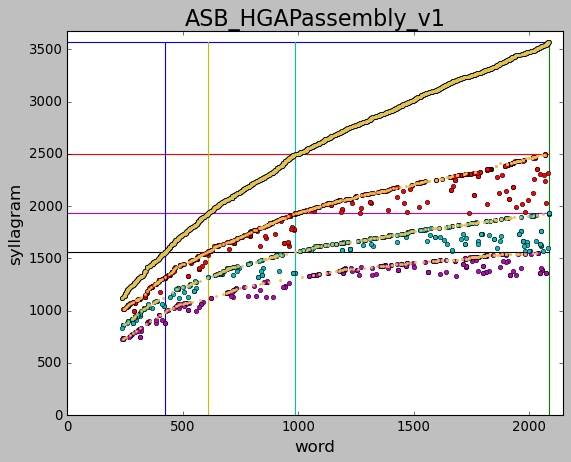

fitting range = [520, 2083]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(ASB_HGAPassembly_v1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Cse_v1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Cse_v1.0.txt)


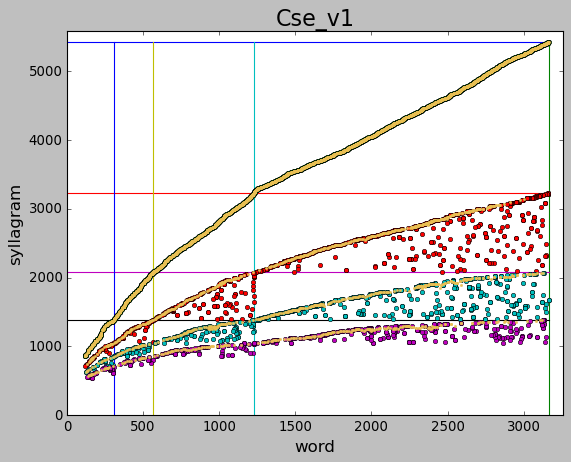

fitting range = [790, 3163]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Cse_v1.0.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Alpaca.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Alpaca.txt)
the (5, 6) block have no point.
the (5, 7) block have no point.
the (5, 7) block have no point.
the (5, 8) block have no point.


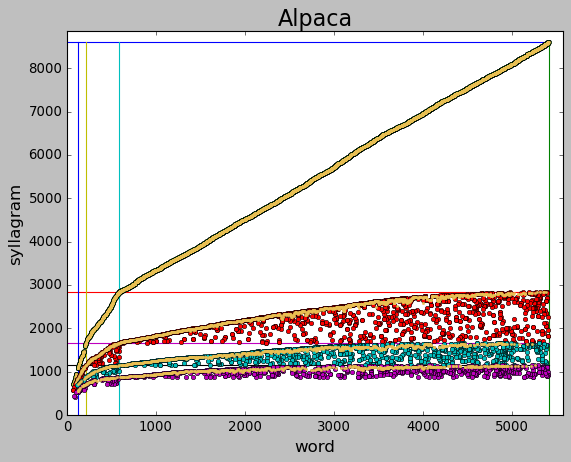

fitting range = [1351, 5407]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Alpaca.txt)
read file successfully!
Successfully count word freqency!(./data/Text/Sscrofa11.1.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(Sscrofa11.1.txt)


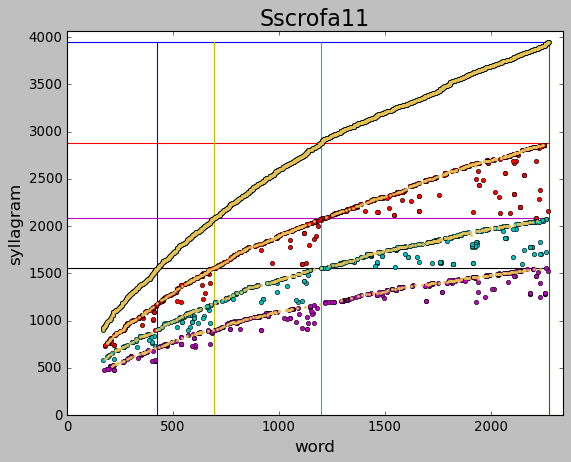

fitting range = [568, 2272]
FRD_word
RRD_coordinate
Allo_fit
Chain_fit
glu
Rg
fit_para_best
degree_component
Successfully run all!(Sscrofa11.1.txt)
read file successfully!
Successfully count word freqency!(./data/Text/PelSin_1.0.txt)
Successfully count syl freqency!
Successfully build data frames!
Successfully count allocation and chain!(PelSin_1.0.txt)
the (4, 7) block have no point.


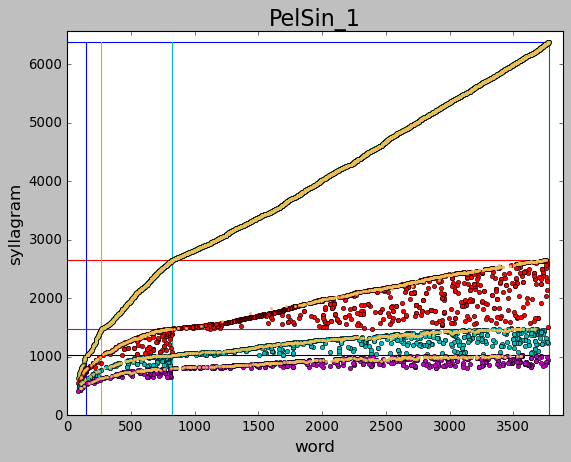

fitting range = [943, 3775]


KeyboardInterrupt: 

In [20]:
main()